In [46]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer
import seaborn as sns
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [105]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

In [43]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score

In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud


In [7]:
data= pd.read_csv('music_sentiment_analysis.csv', skipinitialspace=True)

In [8]:
data.head(5)

,file,artist,title,lyrics,genre,mood,year
0,TRAAAAW128F429D538.h5,Casual,I Didn't Mean To,Verse One:\n\nAlright I might\nHave had a litt...,Hip Hop/Rap,sad,1994
1,TRAAAEF128F4273421.h5,Adam Ant,Something Girls,Adam Ant/Marco Pirroni\nEvery girl is a someth...,Rock,happy,1982
2,TRAAAFD128F92F423A.h5,Gob,Face the Ashes,"I've just erased it's been a while, I've got a...",Rock,sad,2007
3,TRAABJV128F1460C49.h5,Lionel Richie,Tonight Will Be Alright,Little darling \nWhere you've been so long \nI...,R&B,happy,1986
4,TRAABLR128F423B7E3.h5,Blue Rodeo,Floating,"Lead Vocal by Greg\n\nWell, these late night c...",Rock,sad,1987


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   file    1000 non-null   object
 1   artist  1000 non-null   object
 2   title   1000 non-null   object
 3   lyrics  1000 non-null   object
 4   genre   1000 non-null   object
 5   mood    1000 non-null   object
 6   year    1000 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 54.8+ KB


### Check for Missing Values

In [10]:
for col in data:
    pct_missing= (data[col].isnull().sum())
    #print(pct_missing)
    print('{} - {}'.format(col, round(pct_missing)))

file - 0
artist - 0
title - 0
lyrics - 0
genre - 0
mood - 0
year - 0


### Rearranging the columns so target variable is our last column

In [11]:
data.columns.tolist()

['file', 'artist', 'title', 'lyrics', 'genre', 'mood', 'year']

In [12]:
data= data[['file', 'artist', 'title', 'lyrics', 'genre', 'year','mood']]

In [13]:
data.head(2)

,file,artist,title,lyrics,genre,year,mood
0,TRAAAAW128F429D538.h5,Casual,I Didn't Mean To,Verse One:\n\nAlright I might\nHave had a litt...,Hip Hop/Rap,1994,sad
1,TRAAAEF128F4273421.h5,Adam Ant,Something Girls,Adam Ant/Marco Pirroni\nEvery girl is a someth...,Rock,1982,happy


### Check for Class Imbalance

In [15]:
data.mood.value_counts()

sad      554
happy    446
Name: mood, dtype: int64

### Poltting the Target Variable

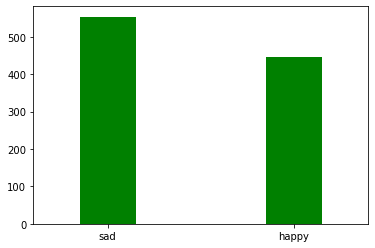

In [16]:
data['mood'].value_counts().plot.bar( rot=0, color="green", width=0.3)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

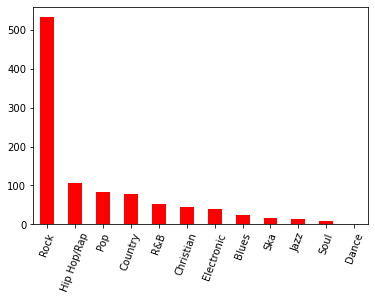

In [17]:
#data.genre.value_counts()
data['genre'].value_counts().plot.bar( rot=0, color="red", width=0.5)
plt.xticks(rotation=70)

In [18]:
happy_songs= data[data.mood=='happy']

In [19]:
sad_songs= data[data.mood=='sad']

In [20]:
# Splitting data into train & test

X= data.drop(['file','mood'], axis=1)
X.shape

(1000, 5)

In [21]:
y= data['mood']
y.shape

(1000,)

### Splitting Data into Train & Test Set

In [22]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=5)

In [23]:
print(X_train.shape)

(800, 5)


In [24]:
print(X_test.shape)

(200, 5)


In [25]:

import spacy
nlp = spacy.load("en_core_web_sm", disable=["parser", "tagger", "ner"]) 

def preprocess(text):
    #print(text)
    doc = nlp(text)
    #print(doc)
    return [token.lemma_ for token in doc if not token.is_stop and token.lemma_.isalpha()]

### Wordcloud for Happy Songs

(-0.5, 999.5, 599.5, -0.5)

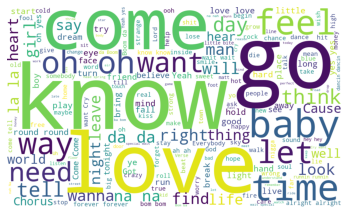

In [26]:
happy_lyrics = happy_songs.lyrics
#print(happy_lyrics)
happy_text = ""
for word in happy_lyrics:
    happy_text = happy_text + " ".join(preprocess(word))


wordcloud = WordCloud(background_color="white", width=1000, height=600, margin=1).generate(happy_text) #, collocations=False
plt.imshow(wordcloud)
plt.axis("off")
# plt.show()
#plt.savefig('happy.png')

### Wordcloud for Sad Songs

(-0.5, 999.5, 599.5, -0.5)

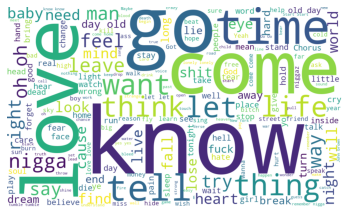

In [27]:
sad_lyrics = sad_songs.lyrics
#print(happy_lyrics)
sad_text = ""
for word in sad_lyrics:
    sad_text = sad_text + " ".join(preprocess(word))


wordcloud = WordCloud(background_color="white", width=1000, height=600, margin=1).generate(sad_text)
plt.imshow(wordcloud)
plt.axis("off")

### Model Building

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

### Map 'Happy' to 1 & 'Sad' to 0 to convert from categorical to numerical

In [29]:
y_train= y_train.map({'happy':1, 'sad':0})

In [30]:
y_test= y_test.map({'happy':1, 'sad':0})

In [436]:
#y_test
#y_train

# Dummy Classifier

c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


              precision    recall  f1-score   support

           0       0.53      0.52      0.52       116
           1       0.36      0.37      0.36        84

    accuracy                           0.46       200
   macro avg       0.44      0.44      0.44       200
weighted avg       0.46      0.46      0.46       200

AUC: 71.095%


Text(0.5, 15.0, 'Predicted label')

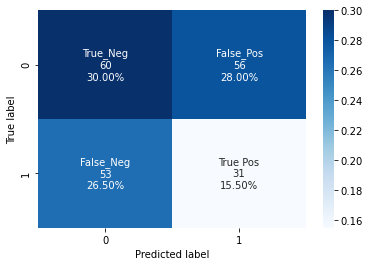

In [128]:
dummy_classifier = DummyClassifier()

pipeline_dummy = Pipeline([
    ('vectorizer', TfidfVectorizer(tokenizer=preprocess)),
    ('classifier', DummyClassifier()),
])

pipeline_dummy.fit(X_train["lyrics"],y_train ) 
predictions = pipeline_dummy.predict(X_test["lyrics"])
print(classification_report(y_test, predictions))

false_pos_rate_KNN, true_pos_rate_KNN, threshold_KNN = roc_curve(y_test, predictions)

print('AUC: {:.3f}%'.format(roc_auc_score(y_test, predicted_prob)*100))

cm = confusion_matrix(y_test, predictions)
group_names = ['True_Neg','False_Pos','False_Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

f = sns.heatmap(cm/ np.sum(cm), annot=labels, fmt='', cmap='Blues')
plt.ylabel('True label')
plt.xlabel('Predicted label')

# KNN

In [31]:
from sklearn.neighbors import KNeighborsClassifier

### Building Pipeline and initializing the hyperparameteres

In [32]:
pipeline_KNN = Pipeline([
    ('vectorizer', TfidfVectorizer(tokenizer=preprocess)),
    ('classifier', KNeighborsClassifier()),
])

In [33]:
parameters_KNN = {
    'vectorizer__binary': (True, False),
    'vectorizer__ngram_range': ((1, 1), (1, 2), (2, 2)),
    'classifier__n_neighbors': [1,3,5], 
    'classifier__weights': ['uniform', 'distance']
}
import multiprocessing as mp
from sklearn.externals.joblib import parallel_backend

c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [34]:
grid = GridSearchCV(pipeline_KNN, parameters_KNN, cv=5, iid=False, verbose=5,n_jobs=1)

In [35]:
grid.fit(X_train["lyrics"], y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] classifier__n_neighbors=1, classifier__weights=uniform, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  classifier__n_neighbors=1, classifier__weights=uniform, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.550, total=   1.2s
[CV] classifier__n_neighbors=1, classifier__weights=uniform, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV]  classifier__n_neighbors=1, classifier__weights=uniform, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.562, total=   1.0s
[CV] classifier__n_neighbors=1, classifier__weights=uniform, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.1s remaining:    0.0s


[CV]  classifier__n_neighbors=1, classifier__weights=uniform, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.569, total=   1.3s
[CV] classifier__n_neighbors=1, classifier__weights=uniform, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.4s remaining:    0.0s


[CV]  classifier__n_neighbors=1, classifier__weights=uniform, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.550, total=   1.3s
[CV] classifier__n_neighbors=1, classifier__weights=uniform, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.7s remaining:    0.0s


[CV]  classifier__n_neighbors=1, classifier__weights=uniform, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.619, total=   1.0s
[CV] classifier__n_neighbors=1, classifier__weights=uniform, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__n_neighbors=1, classifier__weights=uniform, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.544, total=   1.2s
[CV] classifier__n_neighbors=1, classifier__weights=uniform, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__n_neighbors=1, classifier__weights=uniform, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.569, total=   1.4s
[CV] classifier__n_neighbors=1, classifier__weights=uniform, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__n_neighbors=1, classifier__weights=uniform, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.594, total=   1.5s
[CV] classifier__n_neighbors=1, classifier__weights=uniform, v

[CV]  classifier__n_neighbors=1, classifier__weights=distance, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.544, total=   1.2s
[CV] classifier__n_neighbors=1, classifier__weights=distance, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__n_neighbors=1, classifier__weights=distance, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.569, total=   1.3s
[CV] classifier__n_neighbors=1, classifier__weights=distance, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__n_neighbors=1, classifier__weights=distance, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.594, total=   1.5s
[CV] classifier__n_neighbors=1, classifier__weights=distance, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__n_neighbors=1, classifier__weights=distance, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.569, total=   1.3s
[CV] classifier__n_neighbors=1, classifier__weights=dis

[CV]  classifier__n_neighbors=3, classifier__weights=uniform, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.625, total=   1.4s
[CV] classifier__n_neighbors=3, classifier__weights=uniform, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__n_neighbors=3, classifier__weights=uniform, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.581, total=   1.6s
[CV] classifier__n_neighbors=3, classifier__weights=uniform, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__n_neighbors=3, classifier__weights=uniform, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.537, total=   1.3s
[CV] classifier__n_neighbors=3, classifier__weights=uniform, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__n_neighbors=3, classifier__weights=uniform, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.637, total=   1.2s
[CV] classifier__n_neighbors=3, classifier__weights=uniform, v

[CV]  classifier__n_neighbors=3, classifier__weights=distance, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.581, total=   1.3s
[CV] classifier__n_neighbors=3, classifier__weights=distance, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__n_neighbors=3, classifier__weights=distance, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.537, total=   1.3s
[CV] classifier__n_neighbors=3, classifier__weights=distance, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__n_neighbors=3, classifier__weights=distance, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.637, total=   1.2s
[CV] classifier__n_neighbors=3, classifier__weights=distance, vectorizer__binary=True, vectorizer__ngram_range=(2, 2) 
[CV]  classifier__n_neighbors=3, classifier__weights=distance, vectorizer__binary=True, vectorizer__ngram_range=(2, 2), score=0.562, total=   1.4s
[CV] classifier__n_neighbors=3, classifier__weights=dis

[CV]  classifier__n_neighbors=5, classifier__weights=uniform, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.613, total=   1.3s
[CV] classifier__n_neighbors=5, classifier__weights=uniform, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__n_neighbors=5, classifier__weights=uniform, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.631, total=   1.3s
[CV] classifier__n_neighbors=5, classifier__weights=uniform, vectorizer__binary=True, vectorizer__ngram_range=(2, 2) 
[CV]  classifier__n_neighbors=5, classifier__weights=uniform, vectorizer__binary=True, vectorizer__ngram_range=(2, 2), score=0.575, total=   1.5s
[CV] classifier__n_neighbors=5, classifier__weights=uniform, vectorizer__binary=True, vectorizer__ngram_range=(2, 2) 
[CV]  classifier__n_neighbors=5, classifier__weights=uniform, vectorizer__binary=True, vectorizer__ngram_range=(2, 2), score=0.562, total=   1.2s
[CV] classifier__n_neighbors=5, classifier__weights=uniform, v

[CV]  classifier__n_neighbors=5, classifier__weights=distance, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.631, total=   1.2s
[CV] classifier__n_neighbors=5, classifier__weights=distance, vectorizer__binary=True, vectorizer__ngram_range=(2, 2) 
[CV]  classifier__n_neighbors=5, classifier__weights=distance, vectorizer__binary=True, vectorizer__ngram_range=(2, 2), score=0.575, total=   1.7s
[CV] classifier__n_neighbors=5, classifier__weights=distance, vectorizer__binary=True, vectorizer__ngram_range=(2, 2) 
[CV]  classifier__n_neighbors=5, classifier__weights=distance, vectorizer__binary=True, vectorizer__ngram_range=(2, 2), score=0.562, total=   1.3s
[CV] classifier__n_neighbors=5, classifier__weights=distance, vectorizer__binary=True, vectorizer__ngram_range=(2, 2) 
[CV]  classifier__n_neighbors=5, classifier__weights=distance, vectorizer__binary=True, vectorizer__ngram_range=(2, 2), score=0.575, total=   1.3s
[CV] classifier__n_neighbors=5, classifier__weights=dis

[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:  3.9min finished
c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vectorizer',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                    

In [137]:
print("best parameters:", grid.best_params_)

best parameters: {'classifier__n_neighbors': 5, 'classifier__weights': 'uniform', 'vectorizer__binary': False, 'vectorizer__ngram_range': (1, 2)}


### Confusion Matrix for KNN

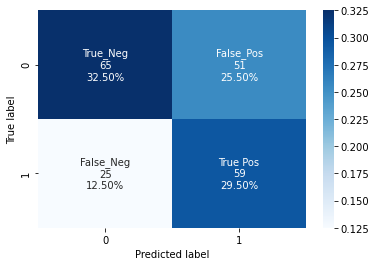

In [138]:
preds= grid.predict(X_test["lyrics"])

cm = confusion_matrix(y_test, preds)
group_names = ['True_Neg','False_Pos','False_Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

f = sns.heatmap(cm/ np.sum(cm), annot=labels, fmt='', cmap='Blues')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.savefig("Confusion Matrix for KNN")

### Evaluation Metrics for KNN

In [139]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.72      0.56      0.63       116
           1       0.54      0.70      0.61        84

    accuracy                           0.62       200
   macro avg       0.63      0.63      0.62       200
weighted avg       0.64      0.62      0.62       200



In [140]:
predicted_prob = grid.predict_proba(X_test["lyrics"])
predicted_prob= predicted_prob[:,1]
false_pos_rate_KNN, true_pos_rate_KNN, threshold_KNN = roc_curve(y_test, predicted_prob)

print('AUC: {:.3f}%'.format(roc_auc_score(y_test, predicted_prob)*100))

AUC: 65.656%


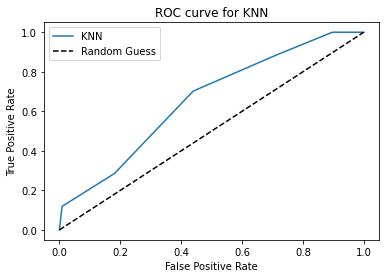

In [141]:
# roc curve
plt.plot(false_pos_rate_KNN, true_pos_rate_KNN, label='KNN')
plt.plot([0,1],[0,1], "k--", label='Random Guess')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="best")
plt.title("ROC curve for KNN")
plt.savefig("ROC curve for KNN")

# Decision Trees

In [49]:
from sklearn.tree import DecisionTreeClassifier

### Building Pipeline and initializing the hyperparameteres

In [50]:
pipeline_DT = Pipeline([
    ('vectorizer', TfidfVectorizer(tokenizer=preprocess)),
    ('classifier', DecisionTreeClassifier()),
])

parameters_DT = {
    'vectorizer__binary': (True, False),
    'vectorizer__ngram_range': ((1, 1), (1, 2), (2, 2)),
    'classifier__max_depth': [2,4,6,8,10,12], 
    'classifier__criterion':['gini', 'entropy']
    
}

In [51]:
grid_decision_tree = GridSearchCV(pipeline_DT, parameters_DT, cv=5, iid=False, verbose=5)

In [52]:
grid_decision_tree.fit(X_train["lyrics"], y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] classifier__criterion=gini, classifier__max_depth=2, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  classifier__criterion=gini, classifier__max_depth=2, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.594, total=   1.1s
[CV] classifier__criterion=gini, classifier__max_depth=2, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV]  classifier__criterion=gini, classifier__max_depth=2, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.613, total=   1.0s
[CV] classifier__criterion=gini, classifier__max_depth=2, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.0s remaining:    0.0s


[CV]  classifier__criterion=gini, classifier__max_depth=2, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.619, total=   0.9s
[CV] classifier__criterion=gini, classifier__max_depth=2, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.9s remaining:    0.0s


[CV]  classifier__criterion=gini, classifier__max_depth=2, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.600, total=   1.4s
[CV] classifier__criterion=gini, classifier__max_depth=2, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.3s remaining:    0.0s


[CV]  classifier__criterion=gini, classifier__max_depth=2, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.519, total=   1.3s
[CV] classifier__criterion=gini, classifier__max_depth=2, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__criterion=gini, classifier__max_depth=2, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.556, total=   1.2s
[CV] classifier__criterion=gini, classifier__max_depth=2, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__criterion=gini, classifier__max_depth=2, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.575, total=   1.2s
[CV] classifier__criterion=gini, classifier__max_depth=2, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__criterion=gini, classifier__max_depth=2, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.600, total=   1.1s
[CV] classifier__criterion=gini, classifier__max_depth=2, vectorizer__binary=True, 

[CV]  classifier__criterion=gini, classifier__max_depth=4, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.588, total=   1.5s
[CV] classifier__criterion=gini, classifier__max_depth=4, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__criterion=gini, classifier__max_depth=4, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.588, total=   1.2s
[CV] classifier__criterion=gini, classifier__max_depth=4, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__criterion=gini, classifier__max_depth=4, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.550, total=   1.8s
[CV] classifier__criterion=gini, classifier__max_depth=4, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__criterion=gini, classifier__max_depth=4, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.606, total=   1.9s
[CV] classifier__criterion=gini, classifier__max_depth=4, vectorizer__binary=True, 

[CV]  classifier__criterion=gini, classifier__max_depth=6, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.562, total=   1.3s
[CV] classifier__criterion=gini, classifier__max_depth=6, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__criterion=gini, classifier__max_depth=6, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.588, total=   1.3s
[CV] classifier__criterion=gini, classifier__max_depth=6, vectorizer__binary=True, vectorizer__ngram_range=(2, 2) 
[CV]  classifier__criterion=gini, classifier__max_depth=6, vectorizer__binary=True, vectorizer__ngram_range=(2, 2), score=0.569, total=   1.4s
[CV] classifier__criterion=gini, classifier__max_depth=6, vectorizer__binary=True, vectorizer__ngram_range=(2, 2) 
[CV]  classifier__criterion=gini, classifier__max_depth=6, vectorizer__binary=True, vectorizer__ngram_range=(2, 2), score=0.575, total=   1.2s
[CV] classifier__criterion=gini, classifier__max_depth=6, vectorizer__binary=True, 

[CV]  classifier__criterion=gini, classifier__max_depth=8, vectorizer__binary=True, vectorizer__ngram_range=(2, 2), score=0.550, total=   1.2s
[CV] classifier__criterion=gini, classifier__max_depth=8, vectorizer__binary=True, vectorizer__ngram_range=(2, 2) 
[CV]  classifier__criterion=gini, classifier__max_depth=8, vectorizer__binary=True, vectorizer__ngram_range=(2, 2), score=0.562, total=   1.4s
[CV] classifier__criterion=gini, classifier__max_depth=8, vectorizer__binary=True, vectorizer__ngram_range=(2, 2) 
[CV]  classifier__criterion=gini, classifier__max_depth=8, vectorizer__binary=True, vectorizer__ngram_range=(2, 2), score=0.550, total=   1.2s
[CV] classifier__criterion=gini, classifier__max_depth=8, vectorizer__binary=True, vectorizer__ngram_range=(2, 2) 
[CV]  classifier__criterion=gini, classifier__max_depth=8, vectorizer__binary=True, vectorizer__ngram_range=(2, 2), score=0.512, total=   1.2s
[CV] classifier__criterion=gini, classifier__max_depth=8, vectorizer__binary=True, 

[CV]  classifier__criterion=gini, classifier__max_depth=10, vectorizer__binary=True, vectorizer__ngram_range=(2, 2), score=0.556, total=   1.2s
[CV] classifier__criterion=gini, classifier__max_depth=10, vectorizer__binary=True, vectorizer__ngram_range=(2, 2) 
[CV]  classifier__criterion=gini, classifier__max_depth=10, vectorizer__binary=True, vectorizer__ngram_range=(2, 2), score=0.500, total=   1.2s
[CV] classifier__criterion=gini, classifier__max_depth=10, vectorizer__binary=True, vectorizer__ngram_range=(2, 2) 
[CV]  classifier__criterion=gini, classifier__max_depth=10, vectorizer__binary=True, vectorizer__ngram_range=(2, 2), score=0.562, total=   1.3s
[CV] classifier__criterion=gini, classifier__max_depth=10, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__criterion=gini, classifier__max_depth=10, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.569, total=   1.3s
[CV] classifier__criterion=gini, classifier__max_depth=10, vectorizer__bin

[CV]  classifier__criterion=gini, classifier__max_depth=12, vectorizer__binary=True, vectorizer__ngram_range=(2, 2), score=0.556, total=   1.2s
[CV] classifier__criterion=gini, classifier__max_depth=12, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__criterion=gini, classifier__max_depth=12, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.569, total=   1.0s
[CV] classifier__criterion=gini, classifier__max_depth=12, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__criterion=gini, classifier__max_depth=12, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.613, total=   1.0s
[CV] classifier__criterion=gini, classifier__max_depth=12, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__criterion=gini, classifier__max_depth=12, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.556, total=   1.3s
[CV] classifier__criterion=gini, classifier__max_depth=12, vectorizer_

[CV]  classifier__criterion=entropy, classifier__max_depth=2, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.444, total=   1.0s
[CV] classifier__criterion=entropy, classifier__max_depth=2, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__criterion=entropy, classifier__max_depth=2, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.556, total=   1.0s
[CV] classifier__criterion=entropy, classifier__max_depth=2, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__criterion=entropy, classifier__max_depth=2, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.556, total=   1.3s
[CV] classifier__criterion=entropy, classifier__max_depth=2, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__criterion=entropy, classifier__max_depth=2, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.519, total=   1.0s
[CV] classifier__criterion=entropy, classifier__max_dep

[CV]  classifier__criterion=entropy, classifier__max_depth=4, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.556, total=   1.1s
[CV] classifier__criterion=entropy, classifier__max_depth=4, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__criterion=entropy, classifier__max_depth=4, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.644, total=   1.6s
[CV] classifier__criterion=entropy, classifier__max_depth=4, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__criterion=entropy, classifier__max_depth=4, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.475, total=   1.2s
[CV] classifier__criterion=entropy, classifier__max_depth=4, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__criterion=entropy, classifier__max_depth=4, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.531, total=   1.5s
[CV] classifier__criterion=entropy, classifier__max_dep

[CV]  classifier__criterion=entropy, classifier__max_depth=6, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.625, total=   1.2s
[CV] classifier__criterion=entropy, classifier__max_depth=6, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__criterion=entropy, classifier__max_depth=6, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.463, total=   1.1s
[CV] classifier__criterion=entropy, classifier__max_depth=6, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__criterion=entropy, classifier__max_depth=6, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.556, total=   1.5s
[CV] classifier__criterion=entropy, classifier__max_depth=6, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__criterion=entropy, classifier__max_depth=6, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.537, total=   1.8s
[CV] classifier__criterion=entropy, classifier__max_dep

[CV]  classifier__criterion=entropy, classifier__max_depth=8, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.475, total=   1.9s
[CV] classifier__criterion=entropy, classifier__max_depth=8, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__criterion=entropy, classifier__max_depth=8, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.512, total=   1.5s
[CV] classifier__criterion=entropy, classifier__max_depth=8, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__criterion=entropy, classifier__max_depth=8, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.562, total=   1.6s
[CV] classifier__criterion=entropy, classifier__max_depth=8, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__criterion=entropy, classifier__max_depth=8, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.569, total=   2.1s
[CV] classifier__criterion=entropy, classifier__max_dep

[CV]  classifier__criterion=entropy, classifier__max_depth=10, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.556, total=   1.8s
[CV] classifier__criterion=entropy, classifier__max_depth=10, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__criterion=entropy, classifier__max_depth=10, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.556, total=   1.5s
[CV] classifier__criterion=entropy, classifier__max_depth=10, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__criterion=entropy, classifier__max_depth=10, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.600, total=   2.0s
[CV] classifier__criterion=entropy, classifier__max_depth=10, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__criterion=entropy, classifier__max_depth=10, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.569, total=   1.6s
[CV] classifier__criterion=entropy, classifier__

[CV]  classifier__criterion=entropy, classifier__max_depth=12, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.575, total=   1.4s
[CV] classifier__criterion=entropy, classifier__max_depth=12, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__criterion=entropy, classifier__max_depth=12, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.600, total=   1.4s
[CV] classifier__criterion=entropy, classifier__max_depth=12, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__criterion=entropy, classifier__max_depth=12, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.575, total=   1.4s
[CV] classifier__criterion=entropy, classifier__max_depth=12, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__criterion=entropy, classifier__max_depth=12, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.531, total=   1.6s
[CV] classifier__criterion=entropy, classifier__

[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  8.3min finished
c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vectorizer',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                    

In [53]:
print("best parameters:", grid_decision_tree.best_params_)

best parameters: {'classifier__criterion': 'entropy', 'classifier__max_depth': 6, 'vectorizer__binary': True, 'vectorizer__ngram_range': (1, 1)}


### Confusion Matrix for Decision Tree

Text(0.5, 15.0, 'Predicted label')

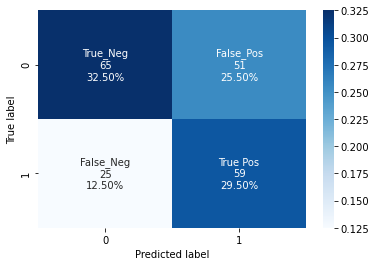

In [54]:
cm = confusion_matrix(y_test, preds)
group_names = ['True_Neg','False_Pos','False_Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

f = sns.heatmap(cm/ np.sum(cm), annot=labels, fmt='', cmap='Blues')
plt.ylabel('True label')
plt.xlabel('Predicted label')

### Evaluation Metrics for Decision Tree

In [55]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.72      0.56      0.63       116
           1       0.54      0.70      0.61        84

    accuracy                           0.62       200
   macro avg       0.63      0.63      0.62       200
weighted avg       0.64      0.62      0.62       200



In [56]:
predicted_prob = grid_decision_tree.predict_proba(X_test["lyrics"])
predicted_prob= predicted_prob[:,1]
false_pos_rate_dt, true_pos_rate_dt, threshold_dt = roc_curve(y_test, predicted_prob)

print('AUC: {:.3f}%'.format(roc_auc_score(y_test, predicted_prob)*100))

AUC: 63.701%


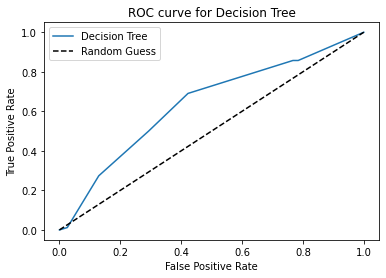

In [57]:
# roc curve
plt.plot(false_pos_rate_dt, true_pos_rate_dt, label='Decision Tree')
plt.plot([0,1],[0,1], "k--", label='Random Guess')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="best")
plt.title("ROC curve for Decision Tree")
plt.savefig("ROC curve for Decision Tree")

# SVM Classifier

In [58]:
from sklearn.svm import SVC
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

### Building Pipeline and initializing the hyperparameteres

In [59]:
pipeline_SVM = Pipeline([
    ('vectorizer', TfidfVectorizer(tokenizer=preprocess)),
    ('classifier', SVC(kernel= "linear", probability=True)),
])

parameters_SVM = {
    'vectorizer__binary': (True, False),
    'vectorizer__ngram_range': ((1, 1), (1, 2), (2, 2)),
    'classifier__C': (0.1, 0.5, 0.8, 1.0)
}

In [60]:
grid_SVM = GridSearchCV(pipeline_SVM, parameters_SVM, cv=5, iid=False, verbose=5)

In [61]:
grid_SVM.fit(X_train["lyrics"], y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] classifier__C=0.1, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  classifier__C=0.1, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.550, total=   2.7s
[CV] classifier__C=0.1, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.6s remaining:    0.0s


[CV]  classifier__C=0.1, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.550, total=   2.5s
[CV] classifier__C=0.1, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.0s remaining:    0.0s


[CV]  classifier__C=0.1, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.550, total=   2.1s
[CV] classifier__C=0.1, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.1s remaining:    0.0s


[CV]  classifier__C=0.1, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.544, total=   2.3s
[CV] classifier__C=0.1, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    9.4s remaining:    0.0s


[CV]  classifier__C=0.1, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.544, total=   2.0s
[CV] classifier__C=0.1, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__C=0.1, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.550, total=   3.0s
[CV] classifier__C=0.1, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__C=0.1, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.550, total=   2.9s
[CV] classifier__C=0.1, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__C=0.1, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.550, total=   3.0s
[CV] classifier__C=0.1, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__C=0.1, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.544, total=   3.0s
[CV] classifier__C=0.1, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__C=0.1, vectorizer__binary=True, 

[CV]  classifier__C=0.5, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.694, total=   2.6s
[CV] classifier__C=0.5, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__C=0.5, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.688, total=   2.4s
[CV] classifier__C=0.5, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__C=0.5, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.631, total=   2.5s
[CV] classifier__C=0.5, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__C=0.5, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.619, total=   3.9s
[CV] classifier__C=0.5, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__C=0.5, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.600, total=   3.0s
[CV] classifier__C=0.5, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__C=0.5, vectorizer__bin

[CV]  classifier__C=1.0, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.662, total=   2.3s
[CV] classifier__C=1.0, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__C=1.0, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.694, total=   2.6s
[CV] classifier__C=1.0, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__C=1.0, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.669, total=   2.4s
[CV] classifier__C=1.0, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__C=1.0, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.662, total=   2.9s
[CV] classifier__C=1.0, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__C=1.0, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.644, total=   2.3s
[CV] classifier__C=1.0, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__C=1.0, vectorizer__binary=True, 

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  5.9min finished
c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vectorizer',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                    

In [62]:
preds= grid_SVM.predict(X_test["lyrics"])

### Confusion Matrix for SVM

Text(0.5, 15.0, 'Predicted label')

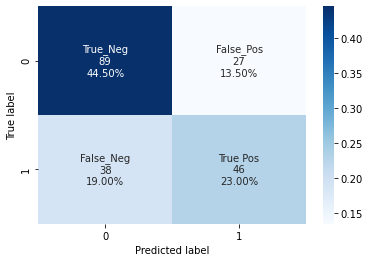

In [63]:
cm = confusion_matrix(y_test, preds)
group_names = ['True_Neg','False_Pos','False_Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

f = sns.heatmap(cm/ np.sum(cm), annot=labels, fmt='', cmap='Blues')
plt.ylabel('True label')
plt.xlabel('Predicted label')

### Evaluation Metrics for SVM

In [64]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.70      0.77      0.73       116
           1       0.63      0.55      0.59        84

    accuracy                           0.68       200
   macro avg       0.67      0.66      0.66       200
weighted avg       0.67      0.68      0.67       200



In [65]:
print("best parameters:", grid_SVM.best_params_)

best parameters: {'classifier__C': 0.8, 'vectorizer__binary': False, 'vectorizer__ngram_range': (1, 1)}


In [66]:
decision_scores = grid_SVM.decision_function(X_test["lyrics"])
FPR_SVM, TPR_SVM, threshold_SVM = roc_curve(y_test, decision_scores)

print('AUC: {:.3f}%'.format(roc_auc_score(y_test, decision_scores)*100))

AUC: 71.695%


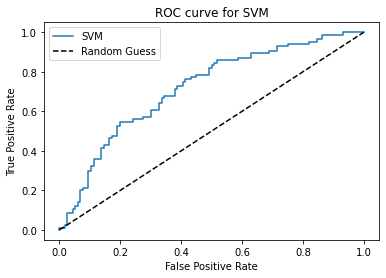

In [67]:
# roc curve
plt.plot(FPR_SVM, TPR_SVM, label='SVM')
plt.plot([0,1],[0,1], "k--", label='Random Guess')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="best")
plt.title("ROC curve for SVM")
plt.savefig("ROC curve for SVM")

### Optimized SVM Classifier

In [ ]:
pipeline_SVM = Pipeline([
    ('vectorizer', TfidfVectorizer(tokenizer=preprocess)),
    ('classifier', SVC(kernel= "linear", probability=True)),
])

parameters_SVM = {
    'vectorizer__binary': (True, False),
    'vectorizer__ngram_range': ((1, 1), (1, 2)),
    'classifier': (0.8)
}

grid = GridSearchCV(pipeline_SVM, parameters_SVM, cv=5, iid=False, verbose=5)
grid.fit(X_train["lyrics"], y_train)

In [ ]:
preds= grid.predict(X_test["lyrics"])
decision_scores = grid.decision_function(X_test["lyrics"])
FPR, TPR, threshold = roc_curve(y_test, decision_scores)

print('AUC: {:.3f}'.format(roc_auc_score(y_test, decision_scores)))

# Naive Bayes

In [69]:
from sklearn.naive_bayes import MultinomialNB

### Building Pipeline and initializing the hyperparameteres

In [70]:
pipeline_naive_bayes = Pipeline([
    ('vectorizer', TfidfVectorizer(tokenizer=preprocess)),
    ('classifier', MultinomialNB())
])

parameters_naive_bayes = {'vectorizer__binary': (True, False),
                        'vectorizer__ngram_range': ((1, 1), (1, 2), (2, 2)),
                        'classifier__alpha': (1, 0.1, 0.01, 0.001)
}

In [71]:
grid_naive_bayes = GridSearchCV(pipeline_naive_bayes, parameters_naive_bayes, cv=5, iid=False, verbose=5)

In [72]:
grid_naive_bayes.fit(X_train["lyrics"], y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] classifier__alpha=1, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  classifier__alpha=1, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.625, total=   1.2s
[CV] classifier__alpha=1, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV]  classifier__alpha=1, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.613, total=   1.2s
[CV] classifier__alpha=1, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.2s remaining:    0.0s


[CV]  classifier__alpha=1, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.613, total=   1.0s
[CV] classifier__alpha=1, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.2s remaining:    0.0s


[CV]  classifier__alpha=1, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.550, total=   1.0s
[CV] classifier__alpha=1, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.2s remaining:    0.0s


[CV]  classifier__alpha=1, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.625, total=   1.2s
[CV] classifier__alpha=1, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__alpha=1, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.588, total=   1.4s
[CV] classifier__alpha=1, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__alpha=1, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.575, total=   1.5s
[CV] classifier__alpha=1, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__alpha=1, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.588, total=   1.3s
[CV] classifier__alpha=1, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__alpha=1, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.556, total=   1.3s
[CV] classifier__alpha=1, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__alpha=1, vec

[CV]  classifier__alpha=0.1, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.656, total=   1.0s
[CV] classifier__alpha=0.1, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__alpha=0.1, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.600, total=   1.0s
[CV] classifier__alpha=0.1, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__alpha=0.1, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.669, total=   1.2s
[CV] classifier__alpha=0.1, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__alpha=0.1, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.650, total=   0.9s
[CV] classifier__alpha=0.1, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__alpha=0.1, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.669, total=   1.2s
[CV] classifier__alpha=0.1, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 


[CV]  classifier__alpha=0.01, vectorizer__binary=False, vectorizer__ngram_range=(2, 2), score=0.581, total=   1.1s
[CV] classifier__alpha=0.01, vectorizer__binary=False, vectorizer__ngram_range=(2, 2) 
[CV]  classifier__alpha=0.01, vectorizer__binary=False, vectorizer__ngram_range=(2, 2), score=0.575, total=   1.1s
[CV] classifier__alpha=0.01, vectorizer__binary=False, vectorizer__ngram_range=(2, 2) 
[CV]  classifier__alpha=0.01, vectorizer__binary=False, vectorizer__ngram_range=(2, 2), score=0.581, total=   1.3s
[CV] classifier__alpha=0.001, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__alpha=0.001, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.600, total=   1.0s
[CV] classifier__alpha=0.001, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__alpha=0.001, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.613, total=   1.0s
[CV] classifier__alpha=0.001, vectorizer__binary=True, vectorizer__ngram_rang

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  2.8min finished
c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vectorizer',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                    

In [74]:
print("best parameters:", grid_naive_bayes.best_params_)

best parameters: {'classifier__alpha': 0.1, 'vectorizer__binary': False, 'vectorizer__ngram_range': (1, 1)}


In [75]:
preds= grid_naive_bayes.predict(X_test["lyrics"])

### Confusion Matrix for Naive Bayes

Text(0.5, 15.0, 'Predicted label')

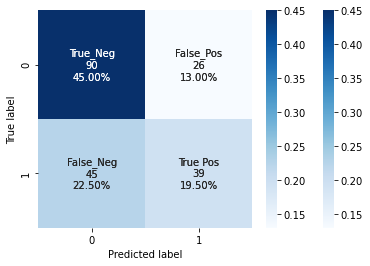

In [76]:
cm = confusion_matrix(y_test, preds)
group_names = ['True_Neg','False_Pos','False_Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

f = sns.heatmap(cm/ np.sum(cm), annot=labels, fmt='', cmap='Blues')
plt.ylabel('True label')
plt.xlabel('Predicted label')
f = sns.heatmap(cm/ np.sum(cm), annot=labels, fmt='', cmap='Blues')
plt.ylabel('True label')
plt.xlabel('Predicted label')

### Evaluation Metrics for Naive Bayes

In [77]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.67      0.78      0.72       116
           1       0.60      0.46      0.52        84

    accuracy                           0.65       200
   macro avg       0.63      0.62      0.62       200
weighted avg       0.64      0.65      0.64       200



In [78]:
predicted_prob = grid_naive_bayes.predict_proba(X_test["lyrics"])
predicted_prob= predicted_prob[:,1]
false_pos_rate_NB, true_pos_rate_NB, threshold_NB = roc_curve(y_test, predicted_prob)

print('AUC: {:.3f}%'.format(roc_auc_score(y_test, predicted_prob)*100))

AUC: 70.218%


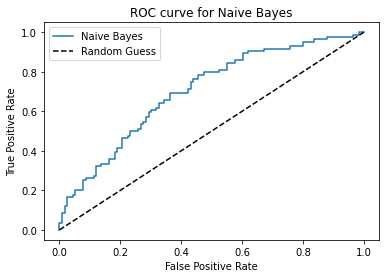

In [79]:
# roc curve
plt.plot(false_pos_rate_NB, true_pos_rate_NB, label='Naive Bayes')
plt.plot([0,1],[0,1], "k--", label='Random Guess')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="best")
plt.title("ROC curve for Naive Bayes")
plt.savefig("ROC curve for Naive Bayes")

# Logistic Regression

### Building Pipeline and initializing the hyperparameteres

In [80]:
LogisticRegression().get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [81]:
pipeline_logistic_reg = Pipeline([
    ('vectorizer', TfidfVectorizer(tokenizer=preprocess)),
    ('classifier', LogisticRegression(solver='lbfgs',multi_class='auto', max_iter=2000))
])

parameters_logistic_reg = {'vectorizer__binary': (True, False),
                        'vectorizer__ngram_range': ((1, 1), (1, 2), (2, 2)),
                        'classifier__C': (np.logspace(-4, 4, 50))
}

In [82]:
grid_log_regression = GridSearchCV(pipeline_logistic_reg, parameters_logistic_reg, cv=5, iid=False, verbose=5)

In [83]:
grid_log_regression.fit(X_train["lyrics"], y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
[CV] classifier__C=0.0001, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  classifier__C=0.0001, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.550, total=   1.1s
[CV] classifier__C=0.0001, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV]  classifier__C=0.0001, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.550, total=   1.0s
[CV] classifier__C=0.0001, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.1s remaining:    0.0s


[CV]  classifier__C=0.0001, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.550, total=   1.0s
[CV] classifier__C=0.0001, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.1s remaining:    0.0s


[CV]  classifier__C=0.0001, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.544, total=   1.2s
[CV] classifier__C=0.0001, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.3s remaining:    0.0s


[CV]  classifier__C=0.0001, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.544, total=   1.0s
[CV] classifier__C=0.0001, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__C=0.0001, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.550, total=   1.3s
[CV] classifier__C=0.0001, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__C=0.0001, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.550, total=   1.5s
[CV] classifier__C=0.0001, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__C=0.0001, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.550, total=   1.6s
[CV] classifier__C=0.0001, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__C=0.0001, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.544, total=   1.3s
[CV] classifier__C=0.0001, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__C=

[CV]  classifier__C=0.00014563484775012445, vectorizer__binary=True, vectorizer__ngram_range=(2, 2), score=0.544, total=   1.6s
[CV] classifier__C=0.00014563484775012445, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__C=0.00014563484775012445, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.550, total=   1.2s
[CV] classifier__C=0.00014563484775012445, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__C=0.00014563484775012445, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.550, total=   1.1s
[CV] classifier__C=0.00014563484775012445, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__C=0.00014563484775012445, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.550, total=   1.1s
[CV] classifier__C=0.00014563484775012445, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__C=0.00014563484775012445, vectorizer__binary=False, vectorizer_

[CV]  classifier__C=0.00021209508879201905, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.550, total=   1.5s
[CV] classifier__C=0.00021209508879201905, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__C=0.00021209508879201905, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.550, total=   1.2s
[CV] classifier__C=0.00021209508879201905, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__C=0.00021209508879201905, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.550, total=   1.2s
[CV] classifier__C=0.00021209508879201905, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__C=0.00021209508879201905, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.544, total=   1.2s
[CV] classifier__C=0.00021209508879201905, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__C=0.00021209508879201905, vectorizer__binary=False, vectorizer

[CV]  classifier__C=0.00030888435964774815, vectorizer__binary=False, vectorizer__ngram_range=(2, 2), score=0.550, total=   1.3s
[CV] classifier__C=0.00030888435964774815, vectorizer__binary=False, vectorizer__ngram_range=(2, 2) 
[CV]  classifier__C=0.00030888435964774815, vectorizer__binary=False, vectorizer__ngram_range=(2, 2), score=0.550, total=   1.3s
[CV] classifier__C=0.00030888435964774815, vectorizer__binary=False, vectorizer__ngram_range=(2, 2) 
[CV]  classifier__C=0.00030888435964774815, vectorizer__binary=False, vectorizer__ngram_range=(2, 2), score=0.544, total=   2.1s
[CV] classifier__C=0.00030888435964774815, vectorizer__binary=False, vectorizer__ngram_range=(2, 2) 
[CV]  classifier__C=0.00030888435964774815, vectorizer__binary=False, vectorizer__ngram_range=(2, 2), score=0.544, total=   1.4s
[CV] classifier__C=0.0004498432668969444, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__C=0.0004498432668969444, vectorizer__binary=True, vectorizer__ng

[CV]  classifier__C=0.0006551285568595509, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.544, total=   1.2s
[CV] classifier__C=0.0006551285568595509, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__C=0.0006551285568595509, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.544, total=   1.6s
[CV] classifier__C=0.0006551285568595509, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__C=0.0006551285568595509, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.550, total=   2.9s
[CV] classifier__C=0.0006551285568595509, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__C=0.0006551285568595509, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.550, total=   1.4s
[CV] classifier__C=0.0006551285568595509, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__C=0.0006551285568595509, vectorizer__binary=True, vectorizer__ngram_range=(1, 

[CV]  classifier__C=0.0009540954763499944, vectorizer__binary=True, vectorizer__ngram_range=(2, 2), score=0.550, total=   1.2s
[CV] classifier__C=0.0009540954763499944, vectorizer__binary=True, vectorizer__ngram_range=(2, 2) 
[CV]  classifier__C=0.0009540954763499944, vectorizer__binary=True, vectorizer__ngram_range=(2, 2), score=0.550, total=   1.9s
[CV] classifier__C=0.0009540954763499944, vectorizer__binary=True, vectorizer__ngram_range=(2, 2) 
[CV]  classifier__C=0.0009540954763499944, vectorizer__binary=True, vectorizer__ngram_range=(2, 2), score=0.550, total=   2.7s
[CV] classifier__C=0.0009540954763499944, vectorizer__binary=True, vectorizer__ngram_range=(2, 2) 
[CV]  classifier__C=0.0009540954763499944, vectorizer__binary=True, vectorizer__ngram_range=(2, 2), score=0.544, total=   1.1s
[CV] classifier__C=0.0009540954763499944, vectorizer__binary=True, vectorizer__ngram_range=(2, 2) 
[CV]  classifier__C=0.0009540954763499944, vectorizer__binary=True, vectorizer__ngram_range=(2, 

[CV]  classifier__C=0.0013894954943731374, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.550, total=   1.0s
[CV] classifier__C=0.0013894954943731374, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__C=0.0013894954943731374, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.544, total=   0.9s
[CV] classifier__C=0.0013894954943731374, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__C=0.0013894954943731374, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.544, total=   0.9s
[CV] classifier__C=0.0013894954943731374, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__C=0.0013894954943731374, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.550, total=   1.5s
[CV] classifier__C=0.0013894954943731374, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__C=0.0013894954943731374, vectorizer__binary=False, vectorizer__ngram_r

[CV]  classifier__C=0.0020235896477251557, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.544, total=   3.0s
[CV] classifier__C=0.0020235896477251557, vectorizer__binary=False, vectorizer__ngram_range=(2, 2) 
[CV]  classifier__C=0.0020235896477251557, vectorizer__binary=False, vectorizer__ngram_range=(2, 2), score=0.550, total=   2.5s
[CV] classifier__C=0.0020235896477251557, vectorizer__binary=False, vectorizer__ngram_range=(2, 2) 
[CV]  classifier__C=0.0020235896477251557, vectorizer__binary=False, vectorizer__ngram_range=(2, 2), score=0.550, total=   1.8s
[CV] classifier__C=0.0020235896477251557, vectorizer__binary=False, vectorizer__ngram_range=(2, 2) 
[CV]  classifier__C=0.0020235896477251557, vectorizer__binary=False, vectorizer__ngram_range=(2, 2), score=0.550, total=   1.2s
[CV] classifier__C=0.0020235896477251557, vectorizer__binary=False, vectorizer__ngram_range=(2, 2) 
[CV]  classifier__C=0.0020235896477251557, vectorizer__binary=False, vectorizer__ngram_r

[CV]  classifier__C=0.004291934260128779, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.550, total=   1.0s
[CV] classifier__C=0.004291934260128779, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__C=0.004291934260128779, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.550, total=   1.0s
[CV] classifier__C=0.004291934260128779, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__C=0.004291934260128779, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.544, total=   1.0s
[CV] classifier__C=0.004291934260128779, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__C=0.004291934260128779, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.544, total=   1.2s
[CV] classifier__C=0.004291934260128779, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__C=0.004291934260128779, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score

[CV]  classifier__C=0.0062505519252739694, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.544, total=   1.2s
[CV] classifier__C=0.0062505519252739694, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__C=0.0062505519252739694, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.544, total=   1.5s
[CV] classifier__C=0.0062505519252739694, vectorizer__binary=True, vectorizer__ngram_range=(2, 2) 
[CV]  classifier__C=0.0062505519252739694, vectorizer__binary=True, vectorizer__ngram_range=(2, 2), score=0.550, total=   1.1s
[CV] classifier__C=0.0062505519252739694, vectorizer__binary=True, vectorizer__ngram_range=(2, 2) 
[CV]  classifier__C=0.0062505519252739694, vectorizer__binary=True, vectorizer__ngram_range=(2, 2), score=0.550, total=   1.3s
[CV] classifier__C=0.0062505519252739694, vectorizer__binary=True, vectorizer__ngram_range=(2, 2) 
[CV]  classifier__C=0.0062505519252739694, vectorizer__binary=True, vectorizer__ngram_range=(2, 

[CV]  classifier__C=0.009102981779915217, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.550, total=   1.2s
[CV] classifier__C=0.009102981779915217, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__C=0.009102981779915217, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.550, total=   1.0s
[CV] classifier__C=0.009102981779915217, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__C=0.009102981779915217, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.550, total=   1.0s
[CV] classifier__C=0.009102981779915217, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__C=0.009102981779915217, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.544, total=   1.0s
[CV] classifier__C=0.009102981779915217, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__C=0.009102981779915217, vectorizer__binary=False, vectorizer__ngram_range=(1, 

[CV]  classifier__C=0.013257113655901081, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.550, total=   1.3s
[CV] classifier__C=0.013257113655901081, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__C=0.013257113655901081, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.544, total=   1.3s
[CV] classifier__C=0.013257113655901081, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__C=0.013257113655901081, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.544, total=   1.4s
[CV] classifier__C=0.013257113655901081, vectorizer__binary=False, vectorizer__ngram_range=(2, 2) 
[CV]  classifier__C=0.013257113655901081, vectorizer__binary=False, vectorizer__ngram_range=(2, 2), score=0.550, total=   1.1s
[CV] classifier__C=0.013257113655901081, vectorizer__binary=False, vectorizer__ngram_range=(2, 2) 
[CV]  classifier__C=0.013257113655901081, vectorizer__binary=False, vectorizer__ngram_range=(2, 

[CV]  classifier__C=0.019306977288832496, vectorizer__binary=False, vectorizer__ngram_range=(2, 2), score=0.544, total=   1.3s
[CV] classifier__C=0.02811768697974228, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__C=0.02811768697974228, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.550, total=   0.9s
[CV] classifier__C=0.02811768697974228, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__C=0.02811768697974228, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.550, total=   0.9s
[CV] classifier__C=0.02811768697974228, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__C=0.02811768697974228, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.550, total=   1.4s
[CV] classifier__C=0.02811768697974228, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__C=0.02811768697974228, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.544,

[CV]  classifier__C=0.040949150623804234, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.550, total=   1.4s
[CV] classifier__C=0.040949150623804234, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__C=0.040949150623804234, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.550, total=   1.5s
[CV] classifier__C=0.040949150623804234, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__C=0.040949150623804234, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.544, total=   2.2s
[CV] classifier__C=0.040949150623804234, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__C=0.040949150623804234, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.544, total=   2.3s
[CV] classifier__C=0.040949150623804234, vectorizer__binary=True, vectorizer__ngram_range=(2, 2) 
[CV]  classifier__C=0.040949150623804234, vectorizer__binary=True, vectorizer__ngram_range=(2, 2), score

[CV]  classifier__C=0.05963623316594643, vectorizer__binary=True, vectorizer__ngram_range=(2, 2), score=0.544, total=   1.5s
[CV] classifier__C=0.05963623316594643, vectorizer__binary=True, vectorizer__ngram_range=(2, 2) 
[CV]  classifier__C=0.05963623316594643, vectorizer__binary=True, vectorizer__ngram_range=(2, 2), score=0.544, total=   1.8s
[CV] classifier__C=0.05963623316594643, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__C=0.05963623316594643, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.550, total=   2.1s
[CV] classifier__C=0.05963623316594643, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__C=0.05963623316594643, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.550, total=   1.6s
[CV] classifier__C=0.05963623316594643, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__C=0.05963623316594643, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.

[CV]  classifier__C=0.08685113737513521, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.550, total=   1.3s
[CV] classifier__C=0.08685113737513521, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__C=0.08685113737513521, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.550, total=   1.3s
[CV] classifier__C=0.08685113737513521, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__C=0.08685113737513521, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.550, total=   1.4s
[CV] classifier__C=0.08685113737513521, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__C=0.08685113737513521, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.544, total=   1.4s
[CV] classifier__C=0.08685113737513521, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__C=0.08685113737513521, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score

[CV]  classifier__C=0.12648552168552957, vectorizer__binary=False, vectorizer__ngram_range=(2, 2), score=0.550, total=   1.2s
[CV] classifier__C=0.12648552168552957, vectorizer__binary=False, vectorizer__ngram_range=(2, 2) 
[CV]  classifier__C=0.12648552168552957, vectorizer__binary=False, vectorizer__ngram_range=(2, 2), score=0.544, total=   1.2s
[CV] classifier__C=0.12648552168552957, vectorizer__binary=False, vectorizer__ngram_range=(2, 2) 
[CV]  classifier__C=0.12648552168552957, vectorizer__binary=False, vectorizer__ngram_range=(2, 2), score=0.544, total=   1.2s
[CV] classifier__C=0.18420699693267145, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__C=0.18420699693267145, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.588, total=   0.9s
[CV] classifier__C=0.18420699693267145, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__C=0.18420699693267145, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.5

[CV]  classifier__C=0.2682695795279725, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.594, total=   1.1s
[CV] classifier__C=0.2682695795279725, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__C=0.2682695795279725, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.556, total=   1.5s
[CV] classifier__C=0.2682695795279725, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__C=0.2682695795279725, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.550, total=   2.0s
[CV] classifier__C=0.2682695795279725, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__C=0.2682695795279725, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.550, total=   1.2s
[CV] classifier__C=0.2682695795279725, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__C=0.2682695795279725, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.544, total=   1

[CV]  classifier__C=0.3906939937054613, vectorizer__binary=True, vectorizer__ngram_range=(2, 2), score=0.556, total=   1.1s
[CV] classifier__C=0.3906939937054613, vectorizer__binary=True, vectorizer__ngram_range=(2, 2) 
[CV]  classifier__C=0.3906939937054613, vectorizer__binary=True, vectorizer__ngram_range=(2, 2), score=0.544, total=   1.1s
[CV] classifier__C=0.3906939937054613, vectorizer__binary=True, vectorizer__ngram_range=(2, 2) 
[CV]  classifier__C=0.3906939937054613, vectorizer__binary=True, vectorizer__ngram_range=(2, 2), score=0.544, total=   1.1s
[CV] classifier__C=0.3906939937054613, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__C=0.3906939937054613, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.606, total=   0.9s
[CV] classifier__C=0.3906939937054613, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__C=0.3906939937054613, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.631, total=

[CV]  classifier__C=0.5689866029018293, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.619, total=   1.2s
[CV] classifier__C=0.5689866029018293, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__C=0.5689866029018293, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.637, total=   1.2s
[CV] classifier__C=0.5689866029018293, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__C=0.5689866029018293, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.613, total=   1.5s
[CV] classifier__C=0.5689866029018293, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__C=0.5689866029018293, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.625, total=   1.3s
[CV] classifier__C=0.5689866029018293, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__C=0.5689866029018293, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.594, t

[CV]  classifier__C=0.8286427728546842, vectorizer__binary=False, vectorizer__ngram_range=(2, 2), score=0.581, total=   1.3s
[CV] classifier__C=0.8286427728546842, vectorizer__binary=False, vectorizer__ngram_range=(2, 2) 
[CV]  classifier__C=0.8286427728546842, vectorizer__binary=False, vectorizer__ngram_range=(2, 2), score=0.581, total=   1.4s
[CV] classifier__C=1.2067926406393288, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__C=1.2067926406393288, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.719, total=   1.5s
[CV] classifier__C=1.2067926406393288, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__C=1.2067926406393288, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.681, total=   1.2s
[CV] classifier__C=1.2067926406393288, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__C=1.2067926406393288, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.631, total= 

[CV]  classifier__C=1.7575106248547894, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.656, total=   1.7s
[CV] classifier__C=1.7575106248547894, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__C=1.7575106248547894, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.662, total=   1.8s
[CV] classifier__C=1.7575106248547894, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__C=1.7575106248547894, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.637, total=   2.0s
[CV] classifier__C=1.7575106248547894, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__C=1.7575106248547894, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.656, total=   1.8s
[CV] classifier__C=1.7575106248547894, vectorizer__binary=True, vectorizer__ngram_range=(2, 2) 
[CV]  classifier__C=1.7575106248547894, vectorizer__binary=True, vectorizer__ngram_range=(2, 2), score=0.594, total=   1

[CV]  classifier__C=2.559547922699533, vectorizer__binary=True, vectorizer__ngram_range=(2, 2), score=0.594, total=   1.5s
[CV] classifier__C=2.559547922699533, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__C=2.559547922699533, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.675, total=   1.0s
[CV] classifier__C=2.559547922699533, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__C=2.559547922699533, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.669, total=   1.0s
[CV] classifier__C=2.559547922699533, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__C=2.559547922699533, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.700, total=   1.2s
[CV] classifier__C=2.559547922699533, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__C=2.559547922699533, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.700, total=   1.

[CV]  classifier__C=3.727593720314938, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.681, total=   1.7s
[CV] classifier__C=3.727593720314938, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__C=3.727593720314938, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.688, total=   1.4s
[CV] classifier__C=3.727593720314938, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__C=3.727593720314938, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.637, total=   1.4s
[CV] classifier__C=3.727593720314938, vectorizer__binary=False, vectorizer__ngram_range=(2, 2) 
[CV]  classifier__C=3.727593720314938, vectorizer__binary=False, vectorizer__ngram_range=(2, 2), score=0.613, total=   1.7s
[CV] classifier__C=3.727593720314938, vectorizer__binary=False, vectorizer__ngram_range=(2, 2) 
[CV]  classifier__C=3.727593720314938, vectorizer__binary=False, vectorizer__ngram_range=(2, 2), score=0.613, total=   1

[CV]  classifier__C=7.9060432109076855, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.669, total=   1.1s
[CV] classifier__C=7.9060432109076855, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__C=7.9060432109076855, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.681, total=   1.3s
[CV] classifier__C=7.9060432109076855, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__C=7.9060432109076855, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.637, total=   1.1s
[CV] classifier__C=7.9060432109076855, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__C=7.9060432109076855, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.675, total=   1.3s
[CV] classifier__C=7.9060432109076855, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__C=7.9060432109076855, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.650, total=   1

[CV]  classifier__C=11.513953993264458, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.650, total=   1.7s
[CV] classifier__C=11.513953993264458, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__C=11.513953993264458, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.681, total=   2.0s
[CV] classifier__C=11.513953993264458, vectorizer__binary=True, vectorizer__ngram_range=(2, 2) 
[CV]  classifier__C=11.513953993264458, vectorizer__binary=True, vectorizer__ngram_range=(2, 2), score=0.575, total=   1.6s
[CV] classifier__C=11.513953993264458, vectorizer__binary=True, vectorizer__ngram_range=(2, 2) 
[CV]  classifier__C=11.513953993264458, vectorizer__binary=True, vectorizer__ngram_range=(2, 2), score=0.631, total=   1.5s
[CV] classifier__C=11.513953993264458, vectorizer__binary=True, vectorizer__ngram_range=(2, 2) 
[CV]  classifier__C=11.513953993264458, vectorizer__binary=True, vectorizer__ngram_range=(2, 2), score=0.588, total=   1

[CV]  classifier__C=16.768329368110066, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.694, total=   1.0s
[CV] classifier__C=16.768329368110066, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__C=16.768329368110066, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.669, total=   1.1s
[CV] classifier__C=16.768329368110066, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__C=16.768329368110066, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.713, total=   1.1s
[CV] classifier__C=16.768329368110066, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__C=16.768329368110066, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.625, total=   1.0s
[CV] classifier__C=16.768329368110066, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__C=16.768329368110066, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.700, t

[CV]  classifier__C=24.420530945486497, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.600, total=   1.4s
[CV] classifier__C=24.420530945486497, vectorizer__binary=False, vectorizer__ngram_range=(2, 2) 
[CV]  classifier__C=24.420530945486497, vectorizer__binary=False, vectorizer__ngram_range=(2, 2), score=0.619, total=   1.8s
[CV] classifier__C=24.420530945486497, vectorizer__binary=False, vectorizer__ngram_range=(2, 2) 
[CV]  classifier__C=24.420530945486497, vectorizer__binary=False, vectorizer__ngram_range=(2, 2), score=0.619, total=   1.6s
[CV] classifier__C=24.420530945486497, vectorizer__binary=False, vectorizer__ngram_range=(2, 2) 
[CV]  classifier__C=24.420530945486497, vectorizer__binary=False, vectorizer__ngram_range=(2, 2), score=0.575, total=   1.4s
[CV] classifier__C=24.420530945486497, vectorizer__binary=False, vectorizer__ngram_range=(2, 2) 
[CV]  classifier__C=24.420530945486497, vectorizer__binary=False, vectorizer__ngram_range=(2, 2), score=0.613, t

[CV]  classifier__C=51.79474679231202, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.675, total=   1.2s
[CV] classifier__C=51.79474679231202, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__C=51.79474679231202, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.650, total=   1.0s
[CV] classifier__C=51.79474679231202, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__C=51.79474679231202, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.631, total=   1.0s
[CV] classifier__C=51.79474679231202, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__C=51.79474679231202, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.675, total=   1.5s
[CV] classifier__C=51.79474679231202, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__C=51.79474679231202, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.706, total=   1.6s
[CV] 

[CV]  classifier__C=75.43120063354607, vectorizer__binary=True, vectorizer__ngram_range=(2, 2), score=0.581, total=   1.3s
[CV] classifier__C=75.43120063354607, vectorizer__binary=True, vectorizer__ngram_range=(2, 2) 
[CV]  classifier__C=75.43120063354607, vectorizer__binary=True, vectorizer__ngram_range=(2, 2), score=0.644, total=   1.5s
[CV] classifier__C=75.43120063354607, vectorizer__binary=True, vectorizer__ngram_range=(2, 2) 
[CV]  classifier__C=75.43120063354607, vectorizer__binary=True, vectorizer__ngram_range=(2, 2), score=0.575, total=   1.4s
[CV] classifier__C=75.43120063354607, vectorizer__binary=True, vectorizer__ngram_range=(2, 2) 
[CV]  classifier__C=75.43120063354607, vectorizer__binary=True, vectorizer__ngram_range=(2, 2), score=0.588, total=   1.5s
[CV] classifier__C=75.43120063354607, vectorizer__binary=True, vectorizer__ngram_range=(2, 2) 
[CV]  classifier__C=75.43120063354607, vectorizer__binary=True, vectorizer__ngram_range=(2, 2), score=0.613, total=   1.4s
[CV] 

[CV]  classifier__C=109.85411419875572, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.688, total=   1.2s
[CV] classifier__C=109.85411419875572, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__C=109.85411419875572, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.606, total=   1.0s
[CV] classifier__C=109.85411419875572, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__C=109.85411419875572, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.688, total=   1.8s
[CV] classifier__C=109.85411419875572, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__C=109.85411419875572, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.681, total=   1.6s
[CV] classifier__C=109.85411419875572, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__C=109.85411419875572, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.700, t

[CV]  classifier__C=159.98587196060572, vectorizer__binary=False, vectorizer__ngram_range=(2, 2), score=0.606, total=   1.5s
[CV] classifier__C=159.98587196060572, vectorizer__binary=False, vectorizer__ngram_range=(2, 2) 
[CV]  classifier__C=159.98587196060572, vectorizer__binary=False, vectorizer__ngram_range=(2, 2), score=0.575, total=   1.6s
[CV] classifier__C=159.98587196060572, vectorizer__binary=False, vectorizer__ngram_range=(2, 2) 
[CV]  classifier__C=159.98587196060572, vectorizer__binary=False, vectorizer__ngram_range=(2, 2), score=0.613, total=   1.6s
[CV] classifier__C=159.98587196060572, vectorizer__binary=False, vectorizer__ngram_range=(2, 2) 
[CV]  classifier__C=159.98587196060572, vectorizer__binary=False, vectorizer__ngram_range=(2, 2), score=0.556, total=   1.5s
[CV] classifier__C=232.99518105153672, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__C=232.99518105153672, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.637, tot

[CV]  classifier__C=339.3221771895323, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.625, total=   1.0s
[CV] classifier__C=339.3221771895323, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__C=339.3221771895323, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.675, total=   1.5s
[CV] classifier__C=339.3221771895323, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__C=339.3221771895323, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.706, total=   1.5s
[CV] classifier__C=339.3221771895323, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__C=339.3221771895323, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.656, total=   1.4s
[CV] classifier__C=339.3221771895323, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__C=339.3221771895323, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.675, total=   1.4s
[CV] 

[CV]  classifier__C=494.1713361323828, vectorizer__binary=True, vectorizer__ngram_range=(2, 2), score=0.575, total=   1.5s
[CV] classifier__C=494.1713361323828, vectorizer__binary=True, vectorizer__ngram_range=(2, 2) 
[CV]  classifier__C=494.1713361323828, vectorizer__binary=True, vectorizer__ngram_range=(2, 2), score=0.594, total=   1.5s
[CV] classifier__C=494.1713361323828, vectorizer__binary=True, vectorizer__ngram_range=(2, 2) 
[CV]  classifier__C=494.1713361323828, vectorizer__binary=True, vectorizer__ngram_range=(2, 2), score=0.606, total=   1.5s
[CV] classifier__C=494.1713361323828, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__C=494.1713361323828, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.688, total=   1.0s
[CV] classifier__C=494.1713361323828, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__C=494.1713361323828, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.719, total=   1.0s
[

[CV]  classifier__C=719.6856730011514, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.688, total=   1.8s
[CV] classifier__C=719.6856730011514, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__C=719.6856730011514, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.681, total=   2.1s
[CV] classifier__C=719.6856730011514, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__C=719.6856730011514, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.694, total=   1.9s
[CV] classifier__C=719.6856730011514, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__C=719.6856730011514, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.662, total=   1.8s
[CV] classifier__C=719.6856730011514, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__C=719.6856730011514, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.606, total=   1

[CV]  classifier__C=1048.1131341546852, vectorizer__binary=False, vectorizer__ngram_range=(2, 2), score=0.613, total=   1.6s
[CV] classifier__C=1048.1131341546852, vectorizer__binary=False, vectorizer__ngram_range=(2, 2) 
[CV]  classifier__C=1048.1131341546852, vectorizer__binary=False, vectorizer__ngram_range=(2, 2), score=0.550, total=   1.7s
[CV] classifier__C=1526.4179671752302, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__C=1526.4179671752302, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.625, total=   1.2s
[CV] classifier__C=1526.4179671752302, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__C=1526.4179671752302, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.656, total=   1.2s
[CV] classifier__C=1526.4179671752302, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__C=1526.4179671752302, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.688, total= 

[CV]  classifier__C=2222.996482526191, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.713, total=   2.1s
[CV] classifier__C=2222.996482526191, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__C=2222.996482526191, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.656, total=   1.7s
[CV] classifier__C=2222.996482526191, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__C=2222.996482526191, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.675, total=   1.5s
[CV] classifier__C=2222.996482526191, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__C=2222.996482526191, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.700, total=   1.7s
[CV] classifier__C=2222.996482526191, vectorizer__binary=True, vectorizer__ngram_range=(2, 2) 
[CV]  classifier__C=2222.996482526191, vectorizer__binary=True, vectorizer__ngram_range=(2, 2), score=0.600, total=   1.4s
[CV] 

[CV]  classifier__C=3237.45754281764, vectorizer__binary=True, vectorizer__ngram_range=(2, 2), score=0.600, total=   1.5s
[CV] classifier__C=3237.45754281764, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__C=3237.45754281764, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.688, total=   1.1s
[CV] classifier__C=3237.45754281764, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__C=3237.45754281764, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.719, total=   1.1s
[CV] classifier__C=3237.45754281764, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__C=3237.45754281764, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.650, total=   1.2s
[CV] classifier__C=3237.45754281764, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__C=3237.45754281764, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.669, total=   1.2s
[CV] c

[CV]  classifier__C=4714.8663634573895, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.694, total=   2.1s
[CV] classifier__C=4714.8663634573895, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__C=4714.8663634573895, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.662, total=   2.1s
[CV] classifier__C=4714.8663634573895, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__C=4714.8663634573895, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.606, total=   2.3s
[CV] classifier__C=4714.8663634573895, vectorizer__binary=False, vectorizer__ngram_range=(2, 2) 
[CV]  classifier__C=4714.8663634573895, vectorizer__binary=False, vectorizer__ngram_range=(2, 2), score=0.594, total=   1.6s
[CV] classifier__C=4714.8663634573895, vectorizer__binary=False, vectorizer__ngram_range=(2, 2) 
[CV]  classifier__C=4714.8663634573895, vectorizer__binary=False, vectorizer__ngram_range=(2, 2), score=0.619, t

[CV]  classifier__C=10000.0, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.625, total=   1.0s
[CV] classifier__C=10000.0, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__C=10000.0, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.650, total=   1.1s
[CV] classifier__C=10000.0, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__C=10000.0, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.688, total=   1.3s
[CV] classifier__C=10000.0, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__C=10000.0, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.650, total=   1.1s
[CV] classifier__C=10000.0, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__C=10000.0, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.619, total=   1.2s
[CV] classifier__C=10000.0, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 
[CV]  clas

[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed: 34.9min finished
c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vectorizer',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                    

In [84]:
print("best parameters:", grid_log_regression.best_params_)

best parameters: {'classifier__C': 232.99518105153672, 'vectorizer__binary': True, 'vectorizer__ngram_range': (1, 2)}


In [85]:
preds= grid_log_regression.predict(X_test["lyrics"])


### Confusion Matrix for Logistic Regression

Text(0.5, 15.0, 'Predicted label')

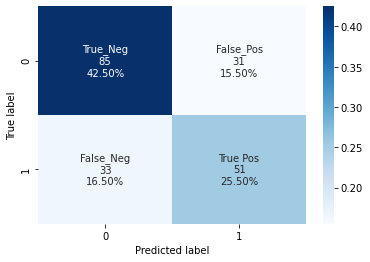

In [86]:
#plot_confusion_matrix(y_test, preds)
import seaborn as sns

cm = confusion_matrix(y_test, preds)

group_names = ['True_Neg','False_Pos','False_Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

f = sns.heatmap(cm/ np.sum(cm), annot=labels, fmt='', cmap='Blues')
plt.ylabel('True label')
plt.xlabel('Predicted label')

### Evaluation Metrics for Logistic Regression

In [87]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.72      0.73      0.73       116
           1       0.62      0.61      0.61        84

    accuracy                           0.68       200
   macro avg       0.67      0.67      0.67       200
weighted avg       0.68      0.68      0.68       200



In [88]:
predicted_prob = grid_log_regression.predict_proba(X_test["lyrics"])
predicted_prob= predicted_prob[:,1]
false_pos_rate_log, true_pos_rate_log, threshold_log = roc_curve(y_test, predicted_prob)

print('AUC: {:.3f}'.format(roc_auc_score(y_test, predicted_prob)))

AUC: 0.772


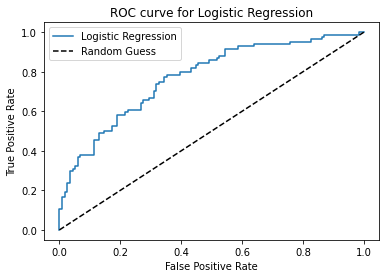

In [89]:
# roc curve
plt.plot(false_pos_rate_log, true_pos_rate_log, label='Logistic Regression')
plt.plot([0,1],[0,1], "k--", label='Random Guess')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="best")
plt.title("ROC curve for Logistic Regression")
plt.savefig("ROC curve for Logistic Regression")

# XG Boost


In [90]:
import xgboost as xgb

### Building Pipeline and initializing the hyperparameteres

In [91]:
pipeline_XG_boost = Pipeline([
    ('vectorizer', TfidfVectorizer(tokenizer=preprocess)),
    ('classifier', xgb.XGBClassifier(objective='binary:logistic', missing=None, seed=42))
])

parameters_XG_boost = {'vectorizer__binary': (True,False),
                       'vectorizer__ngram_range': ((1, 1),(1,2)),
                       'classifier__learning_rate': [0.1,0.5],
                       'classifier__metric':['auc'],
                       'classifier__max_depth' : [4, 5],
                       'classifier__boosting_type' : ['gbdt', 'dart', 'random_forest'],
}

In [92]:
grid = GridSearchCV(pipeline_XG_boost, parameters_XG_boost, cv=5, iid=False, verbose=5,n_jobs=1)

In [93]:
grid.fit(X_train["lyrics"], y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] classifier__boosting_type=gbdt, classifier__learning_rate=0.1, classifier__max_depth=4, classifier__metric=auc, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[16:56:16] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  classifier__boosting_type=gbdt, classifier__learning_rate=0.1, classifier__max_depth=4, classifier__metric=auc, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.662, total=   2.1s
[CV] classifier__boosting_type=gbdt, classifier__learning_rate=0.1, classifier__max_depth=4, classifier__metric=auc, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s


[16:56:19] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  classifier__boosting_type=gbdt, classifier__learning_rate=0.1, classifier__max_depth=4, classifier__metric=auc, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.650, total=   2.5s
[CV] classifier__boosting_type=gbdt, classifier__learning_rate=0.1, classifier__max_depth=4, classifier__metric=auc, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.6s remaining:    0.0s


[16:56:21] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  classifier__boosting_type=gbdt, classifier__learning_rate=0.1, classifier__max_depth=4, classifier__metric=auc, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.644, total=   2.2s
[CV] classifier__boosting_type=gbdt, classifier__learning_rate=0.1, classifier__max_depth=4, classifier__metric=auc, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.9s remaining:    0.0s


[16:56:23] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  classifier__boosting_type=gbdt, classifier__learning_rate=0.1, classifier__max_depth=4, classifier__metric=auc, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.631, total=   2.2s
[CV] classifier__boosting_type=gbdt, classifier__learning_rate=0.1, classifier__max_depth=4, classifier__metric=auc, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    9.1s remaining:    0.0s


[16:56:26] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  classifier__boosting_type=gbdt, classifier__learning_rate=0.1, classifier__max_depth=4, classifier__metric=auc, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.556, total=   2.3s
[CV] classifier__boosting_type=gbdt, classifier__learning_rate=0.1, classifier__max_depth=4, classifier__metric=auc, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 
[16:56:28] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used i

[16:57:13] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  classifier__boosting_type=gbdt, classifier__learning_rate=0.1, classifier__max_depth=4, classifier__metric=auc, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.644, total=   6.8s
[CV] classifier__boosting_type=gbdt, classifier__learning_rate=0.1, classifier__max_depth=4, classifier__metric=auc, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 
[16:57:19] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used

[16:58:04] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  classifier__boosting_type=gbdt, classifier__learning_rate=0.1, classifier__max_depth=5, classifier__metric=auc, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.594, total=   7.0s
[CV] classifier__boosting_type=gbdt, classifier__learning_rate=0.1, classifier__max_depth=5, classifier__metric=auc, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 
[16:58:11] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used i

[16:58:57] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  classifier__boosting_type=gbdt, classifier__learning_rate=0.1, classifier__max_depth=5, classifier__metric=auc, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.644, total=   6.8s
[CV] classifier__boosting_type=gbdt, classifier__learning_rate=0.1, classifier__max_depth=5, classifier__metric=auc, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 
[16:59:04] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used

[16:59:48] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  classifier__boosting_type=gbdt, classifier__learning_rate=0.5, classifier__max_depth=4, classifier__metric=auc, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.594, total=   6.5s
[CV] classifier__boosting_type=gbdt, classifier__learning_rate=0.5, classifier__max_depth=4, classifier__metric=auc, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 
[16:59:55] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used i

[17:00:38] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  classifier__boosting_type=gbdt, classifier__learning_rate=0.5, classifier__max_depth=4, classifier__metric=auc, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.569, total=   6.5s
[CV] classifier__boosting_type=gbdt, classifier__learning_rate=0.5, classifier__max_depth=5, classifier__metric=auc, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 
[17:00:44] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used 

[17:01:29] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  classifier__boosting_type=gbdt, classifier__learning_rate=0.5, classifier__max_depth=5, classifier__metric=auc, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.625, total=   2.2s
[CV] classifier__boosting_type=gbdt, classifier__learning_rate=0.5, classifier__max_depth=5, classifier__metric=auc, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 
[17:01:31] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used

[17:02:15] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  classifier__boosting_type=dart, classifier__learning_rate=0.1, classifier__max_depth=4, classifier__metric=auc, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.650, total=   2.1s
[CV] classifier__boosting_type=dart, classifier__learning_rate=0.1, classifier__max_depth=4, classifier__metric=auc, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 
[17:02:18] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used i

[17:03:01] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  classifier__boosting_type=dart, classifier__learning_rate=0.1, classifier__max_depth=4, classifier__metric=auc, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.675, total=   2.2s
[CV] classifier__boosting_type=dart, classifier__learning_rate=0.1, classifier__max_depth=4, classifier__metric=auc, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 
[17:03:04] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used

[17:03:47] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  classifier__boosting_type=dart, classifier__learning_rate=0.1, classifier__max_depth=5, classifier__metric=auc, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.619, total=   2.2s
[CV] classifier__boosting_type=dart, classifier__learning_rate=0.1, classifier__max_depth=5, classifier__metric=auc, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 
[17:03:50] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used i

[17:04:36] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  classifier__boosting_type=dart, classifier__learning_rate=0.1, classifier__max_depth=5, classifier__metric=auc, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.637, total=   2.3s
[CV] classifier__boosting_type=dart, classifier__learning_rate=0.1, classifier__max_depth=5, classifier__metric=auc, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 
[17:04:38] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used

[17:05:23] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  classifier__boosting_type=dart, classifier__learning_rate=0.5, classifier__max_depth=4, classifier__metric=auc, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.556, total=   6.4s
[CV] classifier__boosting_type=dart, classifier__learning_rate=0.5, classifier__max_depth=4, classifier__metric=auc, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 
[17:05:30] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used i

[17:06:12] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  classifier__boosting_type=dart, classifier__learning_rate=0.5, classifier__max_depth=4, classifier__metric=auc, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.662, total=   6.4s
[CV] classifier__boosting_type=dart, classifier__learning_rate=0.5, classifier__max_depth=4, classifier__metric=auc, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 
[17:06:19] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used

[17:07:03] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  classifier__boosting_type=dart, classifier__learning_rate=0.5, classifier__max_depth=5, classifier__metric=auc, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.594, total=   6.7s
[CV] classifier__boosting_type=dart, classifier__learning_rate=0.5, classifier__max_depth=5, classifier__metric=auc, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 
[17:07:10] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used i

[17:07:54] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  classifier__boosting_type=dart, classifier__learning_rate=0.5, classifier__max_depth=5, classifier__metric=auc, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.644, total=   6.7s
[CV] classifier__boosting_type=dart, classifier__learning_rate=0.5, classifier__max_depth=5, classifier__metric=auc, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 
[17:08:01] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used

[CV]  classifier__boosting_type=random_forest, classifier__learning_rate=0.1, classifier__max_depth=4, classifier__metric=auc, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.637, total=   6.5s
[CV] classifier__boosting_type=random_forest, classifier__learning_rate=0.1, classifier__max_depth=4, classifier__metric=auc, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 
[17:08:44] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  classifier__boosting_type=random_forest, classifier__learning_rate=0.1, classifier__max_depth=4, classifier__metric=auc, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.594, total=   6

[17:09:28] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  classifier__boosting_type=random_forest, classifier__learning_rate=0.1, classifier__max_depth=4, classifier__metric=auc, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.619, total=   6.4s
[CV] classifier__boosting_type=random_forest, classifier__learning_rate=0.1, classifier__max_depth=5, classifier__metric=auc, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 
[17:09:34] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { boosting_type, metric } might not be used.

  This may not be accurate due to some paramet

[CV]  classifier__boosting_type=random_forest, classifier__learning_rate=0.1, classifier__max_depth=5, classifier__metric=auc, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.619, total=   6.9s
[CV] classifier__boosting_type=random_forest, classifier__learning_rate=0.1, classifier__max_depth=5, classifier__metric=auc, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 
[17:10:20] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  classifier__boosting_type=random_forest, classifier__learning_rate=0.1, classifier__max_depth=5, classifier__metric=auc, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.600, total=  

[17:11:06] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  classifier__boosting_type=random_forest, classifier__learning_rate=0.5, classifier__max_depth=4, classifier__metric=auc, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.644, total=   2.2s
[CV] classifier__boosting_type=random_forest, classifier__learning_rate=0.5, classifier__max_depth=4, classifier__metric=auc, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 
[17:11:08] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { boosting_type, metric } might not be used.

  This may not be accurate due to some paramete

[CV]  classifier__boosting_type=random_forest, classifier__learning_rate=0.5, classifier__max_depth=4, classifier__metric=auc, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.575, total=   2.1s
[CV] classifier__boosting_type=random_forest, classifier__learning_rate=0.5, classifier__max_depth=4, classifier__metric=auc, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 
[17:11:51] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  classifier__boosting_type=random_forest, classifier__learning_rate=0.5, classifier__max_depth=4, classifier__metric=auc, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.669, total= 

[17:12:35] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  classifier__boosting_type=random_forest, classifier__learning_rate=0.5, classifier__max_depth=5, classifier__metric=auc, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.675, total=   2.2s
[CV] classifier__boosting_type=random_forest, classifier__learning_rate=0.5, classifier__max_depth=5, classifier__metric=auc, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 
[17:12:37] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { boosting_type, metric } might not be used.

  This may not be accurate due to some paramete

[CV]  classifier__boosting_type=random_forest, classifier__learning_rate=0.5, classifier__max_depth=5, classifier__metric=auc, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.606, total=   4.4s
[CV] classifier__boosting_type=random_forest, classifier__learning_rate=0.5, classifier__max_depth=5, classifier__metric=auc, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 
[19:58:24] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  classifier__boosting_type=random_forest, classifier__learning_rate=0.5, classifier__max_depth=5, classifier__metric=auc, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.669, total= 

[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed: 182.9min finished
c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


[19:59:12] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vectorizer',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                    

### Confusion Matrix for XG Boost

Text(0.5, 15.0, 'Predicted label')

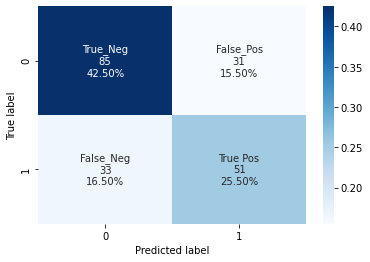

In [99]:
cm = confusion_matrix(y_test, preds)

group_names = ['True_Neg','False_Pos','False_Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

f = sns.heatmap(cm/ np.sum(cm), annot=labels, fmt='', cmap='Blues')
plt.ylabel('True label')
plt.xlabel('Predicted label')

### Evaluation Metrics for XG Boost

In [100]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.72      0.73      0.73       116
           1       0.62      0.61      0.61        84

    accuracy                           0.68       200
   macro avg       0.67      0.67      0.67       200
weighted avg       0.68      0.68      0.68       200



In [101]:
print("best parameters:", grid.best_params_)

best parameters: {'classifier__boosting_type': 'gbdt', 'classifier__learning_rate': 0.1, 'classifier__max_depth': 5, 'classifier__metric': 'auc', 'vectorizer__binary': False, 'vectorizer__ngram_range': (1, 1)}


In [102]:
predicted_prob = grid.predict_proba(X_test["lyrics"])
predicted_prob= predicted_prob[:,1]
false_pos_rate_XG, true_pos_rate_XG, threshold_XG = roc_curve(y_test, predicted_prob)

print('AUC: {:.3f}'.format(roc_auc_score(y_test, predicted_prob)))

AUC: 0.711


### Optimized XG Boost

In [372]:
pipeline_XG_boost = Pipeline([
    ('vectorizer', TfidfVectorizer(tokenizer=preprocess)),
    ('classifier', xgb.XGBClassifier(objective='binary:logistic', missing=None, seed=42))
])

parameters_XG_boost = {'vectorizer__binary': (True,False),
                       'vectorizer__ngram_range': ((1, 1),(1,2)),
                       'classifier__learning_rate': [0.1],
                       'classifier__metric':['auc'],
                       'classifier__max_depth' : [5],
                       'classifier__boosting_type' : ['gbdt'],
}

grid_XG_boost = GridSearchCV(pipeline_XG_boost, parameters_XG_boost, cv=5, iid=False, verbose=5,n_jobs=1)

In [373]:
grid_XG_boost.fit(X_train["lyrics"], y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] classifier__boosting_type=gbdt, classifier__learning_rate=0.1, classifier__max_depth=5, classifier__metric=auc, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[01:25:07] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  classifier__boosting_type=gbdt, classifier__learning_rate=0.1, classifier__max_depth=5, classifier__metric=auc, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.650, total=   2.1s
[CV] classifier__boosting_type=gbdt, classifier__learning_rate=0.1, classifier__max_depth=5, classifier__metric=auc, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[01:25:09] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  classifier__boosting_type=gbdt, classifier__learning_rate=0.1, classifier__max_depth=5, classifier__metric=auc, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.662, total=   2.8s
[CV] classifier__boosting_type=gbdt, classifier__learning_rate=0.1, classifier__max_depth=5, classifier__metric=auc, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.9s remaining:    0.0s


[01:25:12] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  classifier__boosting_type=gbdt, classifier__learning_rate=0.1, classifier__max_depth=5, classifier__metric=auc, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.675, total=   2.7s
[CV] classifier__boosting_type=gbdt, classifier__learning_rate=0.1, classifier__max_depth=5, classifier__metric=auc, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.5s remaining:    0.0s


[01:25:15] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  classifier__boosting_type=gbdt, classifier__learning_rate=0.1, classifier__max_depth=5, classifier__metric=auc, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.619, total=   3.1s
[CV] classifier__boosting_type=gbdt, classifier__learning_rate=0.1, classifier__max_depth=5, classifier__metric=auc, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   10.7s remaining:    0.0s


[01:25:18] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  classifier__boosting_type=gbdt, classifier__learning_rate=0.1, classifier__max_depth=5, classifier__metric=auc, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.550, total=   4.2s
[CV] classifier__boosting_type=gbdt, classifier__learning_rate=0.1, classifier__max_depth=5, classifier__metric=auc, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 
[01:25:23] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used i

[01:26:43] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  classifier__boosting_type=gbdt, classifier__learning_rate=0.1, classifier__max_depth=5, classifier__metric=auc, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.644, total=   9.3s
[CV] classifier__boosting_type=gbdt, classifier__learning_rate=0.1, classifier__max_depth=5, classifier__metric=auc, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 
[01:26:53] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  2.5min finished
c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


[01:27:37] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { boosting_type, metric } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vectorizer',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                    

In [377]:
predicted_prob = grid_XG_boost.predict_proba(X_test["lyrics"])
predicted_prob= predicted_prob[:,1]
false_pos_rate, true_pos_rate, threshold = roc_curve(y_test, predicted_prob)

print('AUC: {:.3f}'.format(roc_auc_score(y_test, predicted_prob)*100))

AUC: 71.095


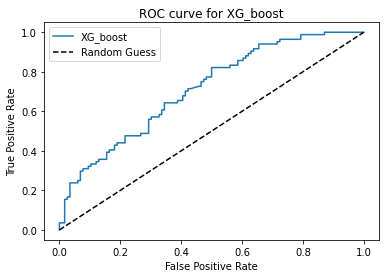

In [104]:
plt.plot(false_pos_rate_XG, true_pos_rate_XG, label='XG_boost')
plt.plot([0,1],[0,1], "k--", label='Random Guess')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="best")
plt.title("ROC curve for XG_boost")
plt.savefig("ROC curve for XG_boost")

### Multi Layer Perceptron

In [388]:
MLPClassifier().get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [155]:
from sklearn.neural_network import MLPClassifier

In [162]:
pipeline_MLP = Pipeline([
    ('vectorizer', TfidfVectorizer(tokenizer=preprocess)),
    ('classifier', MLPClassifier(max_iter = 50, learning_rate_init=0.01, 
                                 ))
])


parameters_MLP = {
    'vectorizer__binary': (True,False),
    'vectorizer__ngram_range': ((1, 1),(1,2)),
    'classifier__hidden_layer_sizes': [(50,50,50), (50,100,50)],
    'classifier__activation': ['tanh','relu'],
    'classifier__solver': ['sgd','adam'],
    'classifier__alpha': [0.0001, 0.05],
    'classifier__learning_rate': ['constant','adaptive'],
}

In [163]:
grid_MLP = GridSearchCV(pipeline_MLP, parameters_MLP, cv=5, iid=False, verbose=5,n_jobs=1)

In [164]:
grid_MLP.fit(X_train["lyrics"], y_train)

Fitting 5 folds for each of 128 candidates, totalling 640 fits
[CV] classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.0s remaining:    0.0s


[CV]  classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.556, total=   5.1s
[CV] classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   10.2s remaining:    0.0s


[CV]  classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.588, total=   5.2s
[CV] classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   14.9s remaining:    0.0s


[CV]  classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.550, total=   4.7s
[CV] classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.562, total=   5.3s
[CV] classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   20.2s remaining:    0.0s
c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.544, total=   4.7s
[CV] classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.550, total=  24.5s
[CV] classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.550, total=  30.4s
[CV] classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.550, total=  39.3s
[CV] classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.544, total=  33.9s
[CV] classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.544, total=  33.6s
[CV] classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.544, total=   7.3s
[CV] classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.581, total=   8.6s
[CV] classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.562, total=  10.1s
[CV] classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.631, total=   8.8s
[CV] classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.662, total=   8.1s
[CV] classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.600, total=  35.0s
[CV] classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.550, total=  33.0s
[CV] classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.562, total=  34.9s
[CV] classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.544, total=  33.1s
[CV] classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.588, total=  38.7s
[CV] classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=adam, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=adam, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.600, total=   5.9s
[CV] classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=adam, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__activation=tanh, classifier__alpha

c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=adam, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.619, total=  40.8s
[CV] classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=adam, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=adam, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.594, total=  11.7s
[CV] classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=adam, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__activation=tanh, classifier__alph

c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.581, total=   6.7s
[CV] classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.550, total=   6.4s
[CV] classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.606, total=   9.1s
[CV] classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.544, total=   8.0s
[CV] classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.544, total=   6.2s
[CV] classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.556, total=  30.6s
[CV] classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.550, total=  28.6s
[CV] classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.588, total=  30.0s
[CV] classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.544, total=  28.6s
[CV] classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.544, total=  29.7s
[CV] classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.581, total=   5.8s
[CV] classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.550, total=   5.2s
[CV] classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.613, total=   5.0s
[CV] classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.556, total=   4.9s
[CV] classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.594, total=   5.0s
[CV] classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.550, total=  24.9s
[CV] classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.550, total=  24.2s
[CV] classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.569, total=  24.2s
[CV] classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.550, total=  24.3s
[CV] classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.556, total=  26.3s
[CV] classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=adam, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=adam, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.613, total=   3.8s
[CV] classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=adam, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__activation=tanh, classifier__alpha

[CV]  classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=adam, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.631, total=  15.6s
[CV] classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=adam, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=adam, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.644, total=  15.4s
[CV] classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=adam, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__activation=tanh, classifier__a

c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.600, total=   6.2s
[CV] classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.556, total=   7.2s
[CV] classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.550, total=   5.9s
[CV] classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.544, total=   6.2s
[CV] classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.544, total=   5.2s
[CV] classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.550, total=  26.2s
[CV] classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.550, total=  25.7s
[CV] classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.550, total=  25.6s
[CV] classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.544, total=  26.6s
[CV] classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.544, total=  29.9s
[CV] classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.613, total=   5.0s
[CV] classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.550, total=   4.9s
[CV] classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.575, total=   5.0s
[CV] classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.556, total=   4.9s
[CV] classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.562, total=   4.9s
[CV] classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.550, total=  25.9s
[CV] classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.550, total=  24.6s
[CV] classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.550, total=  24.6s
[CV] classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.544, total=  24.5s
[CV] classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.544, total=  24.6s
[CV] classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=adam, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=adam, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.631, total=   4.4s
[CV] classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=adam, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__activation=tanh, classifier__a

[CV]  classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=adam, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.625, total=  13.4s
[CV] classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=adam, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=adam, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.562, total=  16.1s
[CV] classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=adam, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__activation=tanh, classifie

c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.550, total=   5.7s
[CV] classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.556, total=   5.2s
[CV] classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.588, total=   5.2s
[CV] classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.544, total=   5.6s
[CV] classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.550, total=   5.6s
[CV] classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.550, total=  28.7s
[CV] classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.550, total=  26.0s
[CV] classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.550, total=  27.3s
[CV] classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.544, total=  26.2s
[CV] classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.544, total=  25.2s
[CV] classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.544, total=   5.3s
[CV] classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.562, total=   5.4s
[CV] classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.575, total=   5.9s
[CV] classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.588, total=   5.2s
[CV] classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.556, total=   5.3s
[CV] classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.550, total=  31.1s
[CV] classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.550, total=  26.9s
[CV] classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.550, total=  25.3s
[CV] classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.550, total=  29.3s
[CV] classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.550, total=  27.5s
[CV] classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=adam, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=adam, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.619, total=   3.3s
[CV] classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=adam, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__activation=tanh, classifier__a

[CV]  classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=adam, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.613, total=  12.3s
[CV] classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=adam, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=adam, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.550, total=  19.9s
[CV] classifier__activation=tanh, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=adam, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__activation=tanh, classifie

c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.562, total=   5.0s
[CV] classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.637, total=   4.9s
[CV] classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.613, total=   4.9s
[CV] classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.544, total=   4.9s
[CV] classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.600, total=   4.9s
[CV] classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.550, total=  24.8s
[CV] classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.550, total=  27.8s
[CV] classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.569, total=  34.1s
[CV] classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.544, total=  32.2s
[CV] classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.544, total=  26.3s
[CV] classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.631, total=   5.8s
[CV] classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.562, total=   5.6s
[CV] classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.550, total=   6.2s
[CV] classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.675, total=   6.7s
[CV] classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.581, total=   5.6s
[CV] classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.550, total=  24.7s
[CV] classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.656, total=  27.1s
[CV] classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.556, total=  33.7s
[CV] classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.562, total=  29.5s
[CV] classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.556, total=  27.1s
[CV] classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=adam, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=adam, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.594, total=   3.5s
[CV] classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=adam, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__activation=tanh, classifier__alpha=0.05, c

c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=adam, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.681, total=  43.0s
[CV] classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=adam, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=adam, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.600, total=  13.4s
[CV] classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=adam, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__activation=tanh, classifier__alpha=0.05, c

c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.613, total=   5.4s
[CV] classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.550, total=   6.9s
[CV] classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.613, total=   6.7s
[CV] classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.581, total=   6.4s
[CV] classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.569, total=   5.0s
[CV] classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.550, total=  29.1s
[CV] classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.550, total=  25.5s
[CV] classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.575, total=  24.7s
[CV] classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.544, total=  28.0s
[CV] classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.544, total=  26.6s
[CV] classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.550, total=   5.0s
[CV] classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.613, total=   4.8s
[CV] classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.569, total=   4.8s
[CV] classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.550, total=   4.9s
[CV] classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.600, total=   4.8s
[CV] classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.550, total=  26.0s
[CV] classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.550, total=  24.3s
[CV] classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.550, total=  24.4s
[CV] classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.550, total=  24.6s
[CV] classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.569, total=  26.3s
[CV] classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=adam, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=adam, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.594, total=   3.5s
[CV] classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=adam, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__activation=tanh, classifier__alpha=0.05, c

c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=adam, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.656, total=   7.8s
[CV] classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=adam, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=adam, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.650, total=   8.2s
[CV] classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=adam, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=adam, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.594, total=   3.4s
[CV] classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=adam, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__activation=tanh, classifier__alpha=0.05, c

c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=adam, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.581, total=   6.8s
[CV] classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=adam, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=adam, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.650, total=  14.2s
[CV] classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=adam, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__activation=tanh, classifier__alpha=0.0

c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.562, total=   6.4s
[CV] classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.625, total=   6.5s
[CV] classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.569, total=   5.8s
[CV] classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.544, total=   5.6s
[CV] classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.569, total=   6.1s
[CV] classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.550, total=  28.2s
[CV] classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.550, total=  28.3s
[CV] classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.550, total=  31.4s
[CV] classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.544, total=  30.4s
[CV] classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.544, total=  24.9s
[CV] classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.631, total=   5.2s
[CV] classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.562, total=   5.1s
[CV] classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.569, total=   5.7s
[CV] classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.569, total=   6.5s
[CV] classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.575, total=   6.8s
[CV] classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.569, total=  35.0s
[CV] classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.556, total=  29.6s
[CV] classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.556, total=  32.4s
[CV] classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.544, total=  30.2s
[CV] classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.556, total=  30.1s
[CV] classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=adam, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=adam, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.613, total=   3.8s
[CV] classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=adam, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__activation=tanh, classifier__alpha=0.0

c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=adam, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.650, total=   7.3s
[CV] classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=adam, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=adam, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.569, total=   2.7s
[CV] classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=adam, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__activation=tanh, classifier__alpha=0.0

c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=adam, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.656, total=   7.6s
[CV] classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=adam, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=adam, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.613, total=   7.3s
[CV] classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=adam, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__activation=tanh, classifier__alpha

c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.550, total=   4.9s
[CV] classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.550, total=   5.0s
[CV] classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.550, total=   5.0s
[CV] classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.581, total=   5.3s
[CV] classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.606, total=   5.0s
[CV] classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.550, total=  25.1s
[CV] classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.550, total=  24.7s
[CV] classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.550, total=  24.5s
[CV] classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.544, total=  26.5s
[CV] classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.544, total=  24.5s
[CV] classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.575, total=   5.2s
[CV] classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.556, total=   5.1s
[CV] classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.569, total=   5.1s
[CV] classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.544, total=   4.9s
[CV] classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.550, total=   5.1s
[CV] classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.550, total=  25.8s
[CV] classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.550, total=  25.9s
[CV] classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.581, total=  25.2s
[CV] classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.544, total=  26.7s
[CV] classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.556, total=  29.1s
[CV] classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=adam, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=adam, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.588, total=   3.3s
[CV] classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=adam, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__activation=tanh, classifier__alpha=0.0

c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=adam, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.644, total=  47.8s
[CV] classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=adam, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=adam, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.644, total=  13.6s
[CV] classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=adam, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__activation=tanh, classifier__alpha=0.0

c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=adam, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.637, total=   8.5s
[CV] classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=adam, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=adam, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.675, total=   3.7s
[CV] classifier__activation=tanh, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=adam, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__activation=tanh, classifier__alpha

c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.550, total=   5.3s
[CV] classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.550, total=   2.3s
[CV] classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.550, total=   5.7s
[CV] classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.544, total=   6.2s
[CV] classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.544, total=   3.0s
[CV] classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__activation=relu, classifier__alpha=0.0

c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.550, total=  27.8s
[CV] classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.550, total=  11.3s
[CV] classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.544, total=  27.8s
[CV] classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.544, total=  26.2s
[CV] classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.550, total=   3.8s
[CV] classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.550, total=   5.5s
[CV] classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.550, total=   4.6s
[CV] classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.544, total=   5.0s
[CV] classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.544, total=   4.9s
[CV] classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.550, total=  25.1s
[CV] classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.550, total=  25.8s
[CV] classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.550, total=  13.1s
[CV] classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.544, total=  26.9s
[CV] classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.544, total=  26.0s
[CV] classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=adam, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=adam, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.600, total=   3.9s
[CV] classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=adam, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__activation=relu, classifier__alpha

c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=adam, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.487, total=  52.7s
[CV] classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=adam, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=adam, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.575, total=  42.2s
[CV] classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=adam, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=adam, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.594, total=  40.4s
[CV] classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=adam, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=adam, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.544, total=  25.1s
[CV] classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=adam, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__activation=relu, classifier__alpha

c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=adam, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.688, total=  40.6s
[CV] classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=adam, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=adam, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.613, total=  39.2s
[CV] classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=adam, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=adam, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.487, total=  15.9s
[CV] classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=adam, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__activation=relu, classifier__a

c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.550, total=   6.5s
[CV] classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.550, total=   6.1s
[CV] classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.550, total=   5.6s
[CV] classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.544, total=   6.2s
[CV] classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.544, total=   6.4s
[CV] classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.550, total=  25.7s
[CV] classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.550, total=  25.3s
[CV] classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.550, total=  25.1s
[CV] classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.544, total=  25.3s
[CV] classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.544, total=  25.2s
[CV] classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.550, total=   5.3s
[CV] classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.550, total=   5.1s
[CV] classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.550, total=   5.1s
[CV] classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.544, total=   5.2s
[CV] classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.544, total=   4.9s
[CV] classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.550, total=  26.0s
[CV] classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.550, total=  25.5s
[CV] classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.550, total=  25.3s
[CV] classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.544, total=  25.8s
[CV] classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.544, total=  25.2s
[CV] classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=adam, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=adam, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.575, total=   7.3s
[CV] classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=adam, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=adam, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.581, total=   3.1s
[CV] classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=adam, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__activation=relu, classifier__alpha

[CV]  classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=adam, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.537, total=  14.4s
[CV] classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=adam, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=adam, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.662, total=  35.4s
[CV] classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.550, total=   5.4s
[CV] classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.550, total=   5.3s
[CV] classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.550, total=   5.4s
[CV] classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.544, total=   2.9s
[CV] classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.544, total=   5.3s
[CV] classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.550, total=   9.9s
[CV] classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__activation=relu, classifier__alpha

c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.550, total=   5.7s
[CV] classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.550, total=   5.4s
[CV] classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.550, total=   2.5s
[CV] classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.544, total=   5.3s
[CV] classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.544, total=   3.4s
[CV] classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__activation=relu, classifier__a

c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.550, total=  25.3s
[CV] classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.550, total=  17.4s
[CV] classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__activation=relu, classifier__a

c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=adam, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.588, total=  38.3s
[CV] classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=adam, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=adam, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.575, total=  37.0s
[CV] classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=adam, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__activation=relu, classifier__a

c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.550, total=   5.4s
[CV] classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.550, total=   5.3s
[CV] classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.550, total=   5.3s
[CV] classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.544, total=   5.4s
[CV] classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.544, total=   5.5s
[CV] classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.550, total=  26.1s
[CV] classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.550, total=  25.4s
[CV] classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.550, total=  25.8s
[CV] classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.544, total=  25.5s
[CV] classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.544, total=  26.5s
[CV] classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.550, total=   5.4s
[CV] classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.550, total=   5.3s
[CV] classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.550, total=   5.3s
[CV] classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.544, total=   5.3s
[CV] classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.544, total=   5.2s
[CV] classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.550, total=  26.0s
[CV] classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.550, total=  25.4s
[CV] classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.550, total=  25.5s
[CV] classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.544, total=  25.6s
[CV] classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.544, total=  25.2s
[CV] classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=adam, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=adam, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.581, total=   5.1s
[CV] classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=adam, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__activation=relu, classifier__a

c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=adam, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.581, total=  38.1s
[CV] classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=adam, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=adam, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.581, total=  38.2s
[CV] classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=adam, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=adam, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.531, total=  15.5s
[CV] classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=adam, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__activation=relu, classifier__a

c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.550, total=   5.3s
[CV] classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.550, total=   5.2s
[CV] classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.550, total=   5.2s
[CV] classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.544, total=   2.0s
[CV] classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.544, total=   5.2s
[CV] classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.550, total=  23.3s
[CV] classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__activation=relu, classifier__alpha=0.05, class

c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.550, total=  25.3s
[CV] classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.544, total=  25.3s
[CV] classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.544, total=  16.0s
[CV] classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.550, total=   5.3s
[CV] classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.550, total=   3.4s
[CV] classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.550, total=   5.3s
[CV] classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.544, total=   5.3s
[CV] classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.544, total=   5.1s
[CV] classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.550, total=  25.5s
[CV] classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.550, total=  13.9s
[CV] classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__activation=relu, classifier__alpha=0.05, c

c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.544, total=  25.1s
[CV] classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.544, total=  24.7s
[CV] classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=adam, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=adam, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.637, total=   4.4s
[CV] classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=adam, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__activation=relu, classifier__alpha=0.05, c

[CV]  classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=adam, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.637, total=  14.0s
[CV] classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=adam, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=adam, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.706, total=  13.7s
[CV] classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=constant, classifier__solver=adam, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__activation=relu, classifier__alpha=0.0

c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.550, total=   5.3s
[CV] classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.550, total=   5.1s
[CV] classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.550, total=   5.2s
[CV] classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.544, total=   5.2s
[CV] classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.544, total=   5.1s
[CV] classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.550, total=  25.5s
[CV] classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.550, total=  25.2s
[CV] classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.550, total=  25.2s
[CV] classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.544, total=  25.3s
[CV] classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.544, total=  24.6s
[CV] classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.550, total=   5.5s
[CV] classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.550, total=   5.1s
[CV] classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.550, total=   5.1s
[CV] classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.544, total=   5.2s
[CV] classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.544, total=   5.1s
[CV] classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.550, total=  25.7s
[CV] classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.550, total=  25.6s
[CV] classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.550, total=  25.2s
[CV] classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.544, total=  25.6s
[CV] classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.544, total=  25.1s
[CV] classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=adam, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=adam, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.644, total=   3.2s
[CV] classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=adam, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__activation=relu, classifier__alpha=0.05, c

[CV]  classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=adam, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.656, total=  13.6s
[CV] classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=adam, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=adam, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.688, total=  13.9s
[CV] classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 50, 50), classifier__learning_rate=adaptive, classifier__solver=adam, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__activation=relu, classifier__alpha=0.0

c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.550, total=   5.3s
[CV] classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.550, total=   2.5s
[CV] classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.550, total=   5.2s
[CV] classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.544, total=   5.4s
[CV] classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.544, total=   5.1s
[CV] classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.550, total=  25.9s
[CV] classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.550, total=   7.0s
[CV] classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.550, total=  25.2s
[CV] classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.544, total=  25.5s
[CV] classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.544, total=  15.9s
[CV] classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.550, total=   6.3s
[CV] classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.550, total=   7.2s
[CV] classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.550, total=   5.2s
[CV] classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.544, total=   5.4s
[CV] classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.544, total=   3.4s
[CV] classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__activation=relu, classifier__alpha=0.0

c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.550, total=  25.2s
[CV] classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.544, total=  10.1s
[CV] classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__activation=relu, classifier__alpha=0.0

c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=adam, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.675, total=   7.1s
[CV] classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=adam, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=adam, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.719, total=   7.3s
[CV] classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=adam, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=adam, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.637, total=   3.3s
[CV] classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=adam, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__activation=relu, classifier__alpha

c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.550, total=   5.4s
[CV] classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.550, total=   5.2s
[CV] classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.550, total=   5.2s
[CV] classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.544, total=   5.3s
[CV] classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.544, total=   5.2s
[CV] classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.550, total=  25.8s
[CV] classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.550, total=  25.2s
[CV] classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.550, total=  25.3s
[CV] classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.544, total=  25.4s
[CV] classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.544, total=  24.6s
[CV] classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.550, total=   5.4s
[CV] classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.550, total=   5.4s
[CV] classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.550, total=   5.3s
[CV] classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.544, total=   5.4s
[CV] classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.544, total=   5.2s
[CV] classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.550, total=  25.9s
[CV] classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.550, total=  25.4s
[CV] classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.550, total=  25.4s
[CV] classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.544, total=  25.2s
[CV] classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.544, total=  25.1s
[CV] classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=adam, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=adam, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.575, total=   3.4s
[CV] classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=adam, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__activation=relu, classifier__alpha=0.0

c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=adam, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.656, total=   7.0s
[CV] classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=adam, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=adam, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.669, total=   4.0s
[CV] classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=adam, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=adam, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.606, total=   6.9s
[CV] classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=adam, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=adam, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.650, total=  13.4s
[CV] classifier__activation=relu, classifier__alpha=0.05, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=adaptive, classifier__solver=adam, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__activation=relu, classifier__alpha

[Parallel(n_jobs=1)]: Done 640 out of 640 | elapsed: 143.7min finished
c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vectorizer',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                    

In [165]:
print("best parameters:", grid_MLP.best_params_)

best parameters: {'classifier__activation': 'relu', 'classifier__alpha': 0.05, 'classifier__hidden_layer_sizes': (50, 50, 50), 'classifier__learning_rate': 'constant', 'classifier__solver': 'adam', 'vectorizer__binary': False, 'vectorizer__ngram_range': (1, 2)}


Text(0.5, 15.0, 'Predicted label')

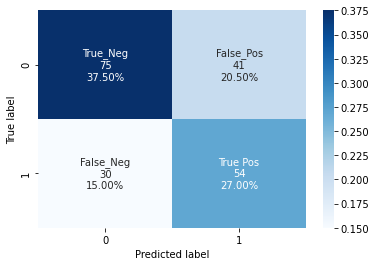

In [166]:
preds= grid_MLP.predict(X_test["lyrics"])
cm = confusion_matrix(y_test, preds)

group_names = ['True_Neg','False_Pos','False_Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

f = sns.heatmap(cm/ np.sum(cm), annot=labels, fmt='', cmap='Blues')
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [167]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.71      0.65      0.68       116
           1       0.57      0.64      0.60        84

    accuracy                           0.65       200
   macro avg       0.64      0.64      0.64       200
weighted avg       0.65      0.65      0.65       200



In [168]:
#pipeline_MLP.predict_proba(X_test["lyrics"])

predicted_prob = grid_MLP.predict_proba(X_test["lyrics"])
predicted_prob= predicted_prob[:,1]
false_pos_rate_MLP, true_pos_rate_MLP, threshold_MLP = roc_curve(y_test, predicted_prob)

print('AUC: {:.3f}'.format(roc_auc_score(y_test, predicted_prob)*100))

AUC: 69.540


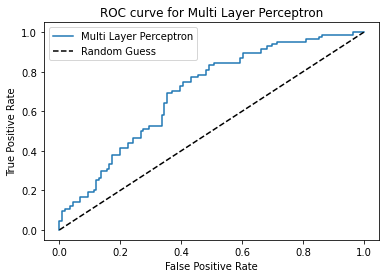

In [169]:
plt.plot(false_pos_rate_MLP, true_pos_rate_MLP, label='Multi Layer Perceptron')
plt.plot([0,1],[0,1], "k--", label='Random Guess')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="best")
plt.title("ROC curve for Multi Layer Perceptron")
plt.savefig("ROC curve for Multi Layer Perceptron")

### Optimized MLP

In [156]:
pipeline_MLP = Pipeline([
    ('vectorizer', TfidfVectorizer(tokenizer=preprocess)),
    ('classifier', MLPClassifier(max_iter = 100, learning_rate_init=0.01, 
                                 ))
])


parameters_MLP = {
    'vectorizer__binary': (True,False),
    'vectorizer__ngram_range': ((1, 1),(1,2)),
    'classifier__hidden_layer_sizes': [(50,100,50)],
    'classifier__activation': ['relu'],
    'classifier__solver': ['sgd'],
    'classifier__alpha': [0.0001],
    'classifier__learning_rate': ['constant'],
}

grid_MLP = GridSearchCV(pipeline_MLP, parameters_MLP, cv=5, iid=False, verbose=5,n_jobs=1)
grid_MLP.fit(X_train["lyrics"], y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.2s remaining:    0.0s


[CV]  classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.550, total=  10.3s
[CV] classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   19.3s remaining:    0.0s


[CV]  classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.562, total=   9.1s
[CV] classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 
[CV]  classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.550, total=   4.5s
[CV] classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   23.8s remaining:    0.0s


[CV]  classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.544, total=   3.3s
[CV] classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1) 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   27.1s remaining:    0.0s


[CV]  classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 1), score=0.544, total=   2.8s
[CV] classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.550, total=  13.8s
[CV] classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.550, total=  59.8s
[CV] classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.550, total=  14.9s
[CV] classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__activation=relu, classifier__alpha

c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=True, vectorizer__ngram_range=(1, 2), score=0.544, total=  51.0s
[CV] classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.569, total=  11.4s
[CV] classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.594, total=  12.2s
[CV] classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.550, total=  13.7s
[CV] classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.544, total=   9.7s
[CV] classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1) 


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 1), score=0.556, total=  10.3s
[CV] classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2), score=0.550, total=  11.5s
[CV] classifier__activation=relu, classifier__alpha=0.0001, classifier__hidden_layer_sizes=(50, 100, 50), classifier__learning_rate=constant, classifier__solver=sgd, vectorizer__binary=False, vectorizer__ngram_range=(1, 2) 
[CV]  classifier__activation=relu, classifier__a

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  5.0min finished
c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vectorizer',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                    

In [159]:
predicted_prob = grid_MLP.predict_proba(X_test["lyrics"])
predicted_prob= predicted_prob[:,1]
false_pos_rate_MLP, true_pos_rate_MLP, threshold_MLP = roc_curve(y_test, predicted_prob)

print('AUC: {:.3f}'.format(roc_auc_score(y_test, predicted_prob)*100))

AUC: 69.550


In [120]:
model_comparison= pd.DataFrame({'Model':['Dummy', 'Logistic Regression', 'KNN', 'Naive Bayes', 'Decision Trees', 'SVM', 'XG Boost', 'MLP'],
                   'Accuracy':[0.55, 0.51,0.62,0.64, 0.62, 0.67, 0.63, 0.70],
                   'Precision':[0.46,0.68, 0.64, 0.64, 0.64, 0.67, 0.63, 0.7],
                   'Recall': [0.45,0.68, 0.62, 0.65, 0.62, 0.68, 0.63, 0.7],
                   'F1 Score':[0.45, 0.68, 0.62,0.64, 0.62, 0.67, 0.63, 0.7],
                   'AUC (%)': [71.1, 77.2, 65.6,70.21,62.4, 71.69, 71.1, 78.2]
    
})

In [121]:
model_comparison.index= model_comparison.Model

In [123]:
model_comparison.drop('Model', axis=1, inplace=True)

In [124]:
model_comparison

,Accuracy,Precision,Recall,F1 Score,AUC (%)
Model,,,,,
Dummy,0.55,0.46,0.45,0.45,71.10
Logistic Regression,0.51,0.68,0.68,0.68,77.20
KNN,0.62,0.64,0.62,0.62,65.60
Naive Bayes,0.64,0.64,0.65,0.64,70.21
Decision Trees,0.62,0.64,0.62,0.62,62.40
SVM,0.67,0.67,0.68,0.67,71.69
XG Boost,0.63,0.63,0.63,0.63,71.10
MLP,0.70,0.70,0.70,0.70,78.20


Text(0.5, 1.0, 'ROC curve')

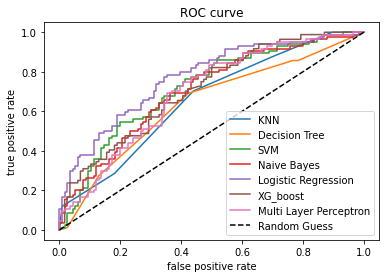

In [180]:
plt.plot(false_pos_rate_KNN, true_pos_rate_KNN, label='KNN')
plt.plot(false_pos_rate_dt, true_pos_rate_dt, label='Decision Tree')
plt.plot(FPR_SVM, TPR_SVM, label='SVM')
plt.plot(false_pos_rate_NB, true_pos_rate_NB, label='Naive Bayes')
plt.plot(false_pos_rate_log, true_pos_rate_log, label='Logistic Regression')
plt.plot(false_pos_rate_XG, true_pos_rate_XG, label='XG_boost')
plt.plot(false_pos_rate_MLP, true_pos_rate_MLP, label='Multi Layer Perceptron')
plt.plot([0,1],[0,1], "k--", label='Random Guess')
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc="best")
plt.title("ROC curve")